# Аналитика HH.ru

### Описание: Анализ данных ваканский сайта hh.ru

### Цель: Выявиль различия в предполагаемых вакансиях для Аналитикой данных и специалистов по Data Science

### Этапы проекта:

1.	Предобработка данных.
2.	Исследовательский анализ данных.
3.	Выявление грейда требуемых специалистов по названию вакансии или по колонке с требуемым опытом.
4.	Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и специалистов DS.
5.	Определение типичного места работы для Аналитика данных и специалистов DS по следующим параметрам: ТОП- работодателей по числу вакансий, зарплата, тип занятости, график работы. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.
6.	Определение, какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к какой специальности требований больше.
7.	Определение наиболее желаемых кандидатов на вакансии Аналитик данных и специалистов DS по следующим параметрам: самые важные hard-skils, самые важные soft-skils. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.
8.	Расчет помесячной динамики количества вакансий для Аналитика данных и специалистов DS. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.
9.	Формулирование выводов и рекомендаций.


### Ход работы:

### Загрузка и предобработка данных

In [1]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import ast

In [2]:
da = pd.read_excel('D:/Мастерская/Датасет/Датасет/vacancies_da.xlsx')
ds = pd.read_excel('D:/Мастерская/Датасет/Датасет/vacancies_ds.xlsx')

In [3]:
da.sample(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
156,100809842,Junior Data Analyst,2024-05-31 12:02:00,https://hh.ru/vacancy/100809842,Открытая,СБЕР,Сбер для экспертов,Москва,Junior+ (1-3 years),[],Полный день,Полная занятость,мы - команда управления моделирования и исслед...,команда управление моделирование исследование ...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
766,95262750,Аналитик данных (Специалист 1 категории),2024-03-22 10:12:46,https://hh.ru/vacancy/95262750,Открытая,Ай-Пласт,NaN,Набережные Челны,Middle (3-6 years),"['Способность к саморазвитию', 'Инициативность...",Полный день,Полная занятость,ай-пласт — лидирующее российское предприятие п...,ай пласт лидировать российский предприятие про...,137000.0,NaN,ЗП не указана,"Коммуникативная гибкость, Системность мышления...",NaN,NaN
240,101336320,Data Analyst (команда Data Science и клиентска...,2024-06-05 12:25:00,https://hh.ru/vacancy/101336320,Открытая,СБЕР,Сбер для экспертов,Москва,Junior+ (1-3 years),[],Полный день,Полная занятость,в команду «data science и клиентская аналитика...,команда data science клиентский аналитика корп...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
991,96270334,Аналитик данных/Специалист по работе с базой д...,2024-05-08 12:29:07,https://hh.ru/vacancy/96270334,Открытая,ГБУ Московское Долголетие,NaN,Москва,Junior+ (1-3 years),"['Анализ данных', 'SQL', 'Бизнес-анализ', 'Раз...",Гибкий график,Полная занятость,приглашаем в наш проект кандидатов на должност...,приглашать наш проект кандидат должность анали...,NaN,NaN,ЗП не указана,"SQL, Работа с большим объемом информации, Бизн...",NaN,Аналитическое мышление
1073,96648811,Data Analyst,2024-05-08 09:36:00,https://hh.ru/vacancy/96648811,Открытая,СБЕР,Сбер для экспертов,Екатеринбург,Junior+ (1-3 years),[],Полный день,Полная занятость,мы в поиске data analyst&#39;a по направлению ...,поиск data analyst 39 a направление лидогенера...,NaN,NaN,ЗП не указана,NaN,NaN,NaN


In [4]:
ds.sample(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
194,91273843,Data scientist (Персонализация),2024-06-10 11:56:48,https://hh.ru/vacancy/91273843,Открытая,Спортмастер,"Компания «СПОРТМАСТЕР», Sportmaster Lab",Москва,Junior+ (1-3 years),"['Python', 'Oracle Pl/SQL', 'SQL', 'confluence...",Удаленная работа,Полная занятость,у нас появляется все больше новых продуктов в ...,появляться новый продукт data science направле...,NaN,NaN,ЗП не указана,"Python, SQL, Oracle Pl/SQL, Big Data, ML, Маши...",confluence,NaN
723,97409034,Senior Data Scientist (Промо Прогноз),2024-04-19 10:48:11,https://hh.ru/vacancy/97409034,Открытая,"МАГНИТ, Розничная сеть",NaN,Краснодар,Middle (3-6 years),"['Python', 'Hadoop', 'Airflow', 'SQL', 'Spark'...",Удаленная работа,Полная занятость,"компания magnittech — это опытная команда it, ...",компания magnittech опытный команда it создава...,NaN,NaN,ЗП не указана,"SQL, Hadoop, Spark, Python, Airflow, Linux",Юнит-экономика,NaN
270,93626854,Data Scientist,2024-06-10 16:27:02,https://hh.ru/vacancy/93626854,Открытая,СБЕР,Сбер для экспертов,Москва,Middle (3-6 years),[],Полный день,Полная занятость,ai-команда сбера ищет специалиста (middle/midd...,ai команда сбера искать специалист middle midd...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
802,97967656,Middle Data Scientist,2024-05-26 09:16:20,https://hh.ru/vacancy/97967656,Открытая,GlowByte,NaN,Москва,Junior+ (1-3 years),[],Полный день,Полная занятость,glowbyte - лидер в сфере разработки business i...,glowbyte лидер сфера разработка business intel...,NaN,NaN,ЗП не указана,NaN,NaN,NaN
226,92139066,Senior Data Scientist (главный исследователь д...,2024-03-18 17:16:49,https://hh.ru/vacancy/92139066,Открытая,"ВСК, САО",NaN,Москва,Junior+ (1-3 years),"['Python', 'СУБДД: MS SQL PostgreSQL Oracle', ...",Полный день,Полная занятость,ключевые задачи: разработка ml - математическ...,ключевой задача разработка ml математический м...,NaN,NaN,ЗП не указана,"Python, Математическая статистика, SQL, Pandas...",Pandas,NaN


In [5]:
def data_info(df):
    return display(df.info()), display(df.duplicated().sum())

In [6]:
data_info(da)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

None

0

(None, None)

In [7]:
data_info(ds)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 974 entries, 0 to 973
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                974 non-null    int64         
 1   name                              974 non-null    object        
 2   published_at                      974 non-null    datetime64[ns]
 3   alternate_url                     974 non-null    object        
 4   type                              974 non-null    object        
 5   employer                          974 non-null    object        
 6   department                        413 non-null    object        
 7   area                              974 non-null    object        
 8   experience                        974 non-null    object        
 9   key_skills                        974 non-null    object        
 10  schedule                          974 non-null    

None

0

(None, None)

- Явных дубликатов нет, далее буду смотреть по данным, что можно удалить, а что нет. Пропуски таже имеются, но они не повлияют на анализ.

### Исследовательский анализ

- По ходу анализа будем смотреть дополнительные данные.

### Выявление грейда требуемых специалистов по названию вакансии или по колонке с требуемым опытом.

In [8]:
da_grade = da.groupby('experience').agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
da_grade

,id
experience,
Junior+ (1-3 years),1091
Middle (3-6 years),555
Junior (no experince),142
Senior (6+ years),13


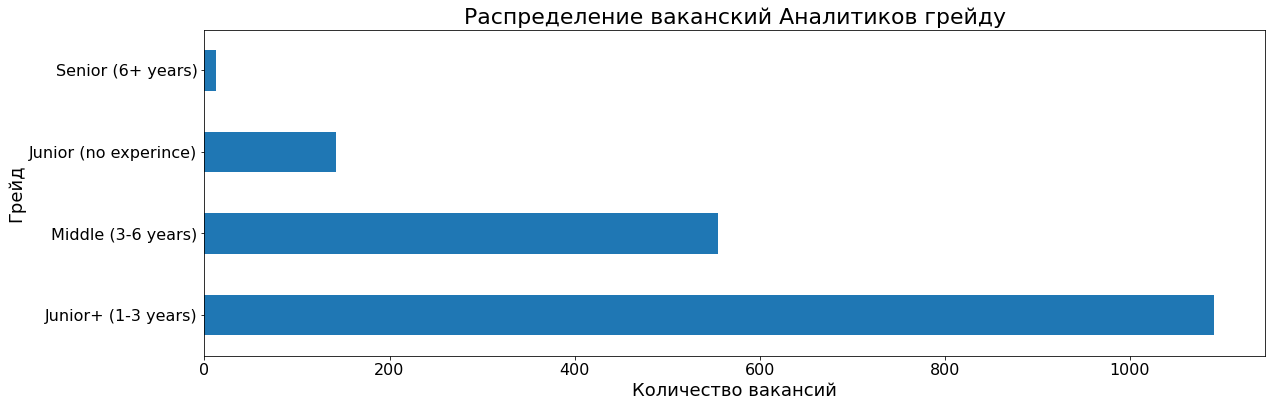

In [9]:
da_grade.plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
plt.title('Распределение ваканский Аналитиков грейду', 
          fontsize = 22, color = 'Black')
plt.xlabel('Количество вакансий', fontsize = 18, color = 'Black')
plt.ylabel('Грейд', fontsize = 18, color = 'Black')
plt.show()

- На рынке больше всего требуются Аналитики уровня Junior+, в наименьшей степени Senior

In [10]:
ds_grade = ds.groupby('experience').agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
ds_grade

,id
experience,
Middle (3-6 years),465
Junior+ (1-3 years),433
Junior (no experince),44
Senior (6+ years),32


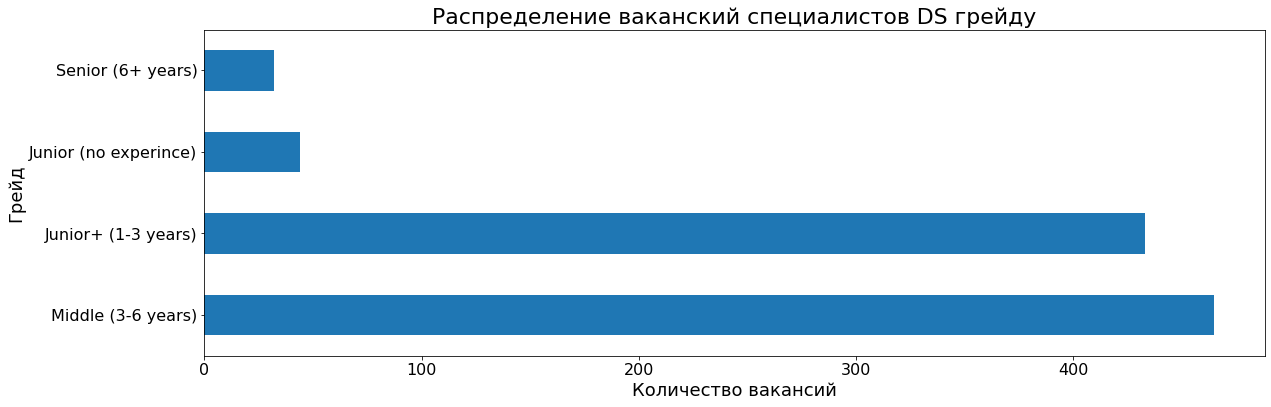

In [11]:
ds_grade.plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
plt.title('Распределение ваканский специалистов DS грейду', 
          fontsize = 22, color = 'Black')
plt.xlabel('Количество вакансий', fontsize = 18, color = 'Black')
plt.ylabel('Грейд', fontsize = 18, color = 'Black')
plt.show()

- На рынке больше всего требуются специалисты по DS уровня Middle, в наименьшей степени Senior

### Определение доли грейдов Junior, Junior+, Middle, Senior среди вакансий Аналитик данных и специалистов DS.

In [12]:
grade = ['Junior+', 'Middle', 'Junior', 'Senior']
#grade

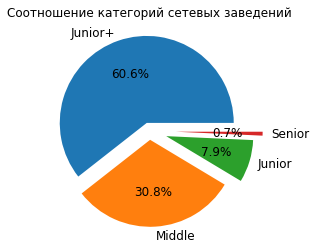

In [13]:
fig1, ax1 = plt.subplots()
explode = [0.1, 0.1, 0.2, 0.3]
ax1.pie(da_grade['id'], labels=grade, autopct='%1.1f%%', explode=explode,
       textprops={'color':'black', 'fontsize':12})
plt.title('Cоотношение категорий сетевых заведений')
plt.show()

- По паспределению грейдов у Аналитиков Junior+ больше всего, 60.6%, Middle 30.8%, Junior 7.9%, и меньше всего Senior 0.7%

In [14]:
grade = ['Middle', 'Junior+',  'Junior', 'Senior']
#grade

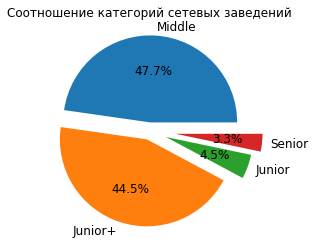

In [15]:
fig1, ax1 = plt.subplots()
explode = [0.1, 0.1, 0.2, 0.3]
ax1.pie(ds_grade['id'], labels=grade, autopct='%1.1f%%', explode=explode,
       textprops={'color':'black', 'fontsize':12})
plt.title('Cоотношение категорий сетевых заведений')
plt.show()

- По паспределению грейдов у специалистов DS Middle больше всего, 47.7%, Junior+ 44.5%, Junior 4.5%, и меньше всего Senior 3.3%

### Определение типичного места работы для Аналитика данных и специалистов DS по следующим параметрам: ТОП- работодателей по числу вакансий, зарплата, тип занятости, график работы. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.

In [16]:
df_t1 = da.groupby(['employer', 'experience'], \
                        as_index = False)[['id']].count()
df_t1.sort_values(by=['id'], ascending=False).head(15)

,employer,experience,id
628,СБЕР,Junior+ (1-3 years),159
629,СБЕР,Middle (3-6 years),71
229,WILDBERRIES,Middle (3-6 years),26
300,Банк ВТБ (ПАО),Junior+ (1-3 years),24
702,Т1,Middle (3-6 years),21
157,Ozon,Junior+ (1-3 years),17
228,WILDBERRIES,Junior+ (1-3 years),16
158,Ozon,Middle (3-6 years),15
477,"МАГНИТ, Розничная сеть",Junior+ (1-3 years),15
484,МТС,Junior+ (1-3 years),15


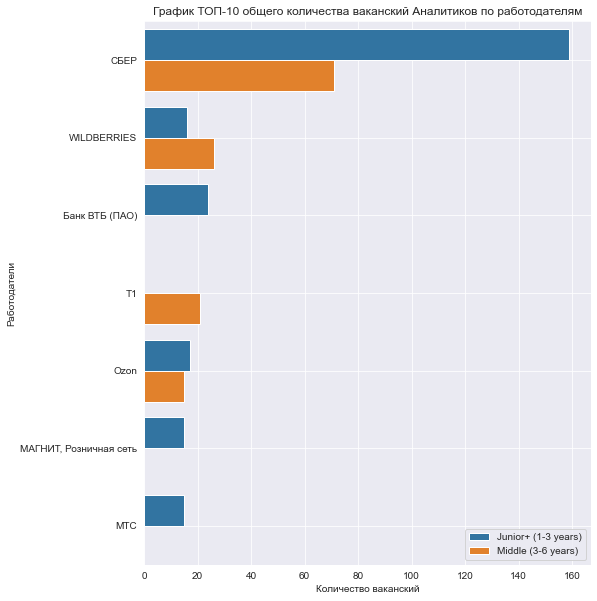

In [17]:
pl = df_t1.sort_values(by=['id'], ascending=False).head(10)
sns.set_style('dark')
plt.figure(figsize=(8, 10))
sns.barplot(x='id', y='employer', data=pl, hue='experience')
plt.title('График ТОП-10 общего количества ваканский Аналитиков по работодателям')
plt.xlabel('Количество ваканский')
plt.ylabel('Работодатели')
plt.legend(loc='lower right', fontsize=10)
plt.grid()
plt.show()

- В общем больше всего вакансий предлагает СБЕР для Junior+ и Middle специалистов Аналитиков.

In [18]:
df_t1 = ds.groupby(['employer', 'experience'], \
                        as_index = False)[['id']].count()
df_t1.sort_values(by=['id'], ascending=False).head(15)


,employer,experience,id
290,СБЕР,Junior+ (1-3 years),96
291,СБЕР,Middle (3-6 years),88
75,Ozon,Middle (3-6 years),25
172,Газпромбанк,Middle (3-6 years),16
110,WILDBERRIES,Middle (3-6 years),14
91,Samokat.tech,Middle (3-6 years),13
143,Банк ВТБ (ПАО),Junior+ (1-3 years),13
323,Т1,Middle (3-6 years),12
289,СБЕР,Junior (no experince),12
288,Ростелеком,Junior+ (1-3 years),12


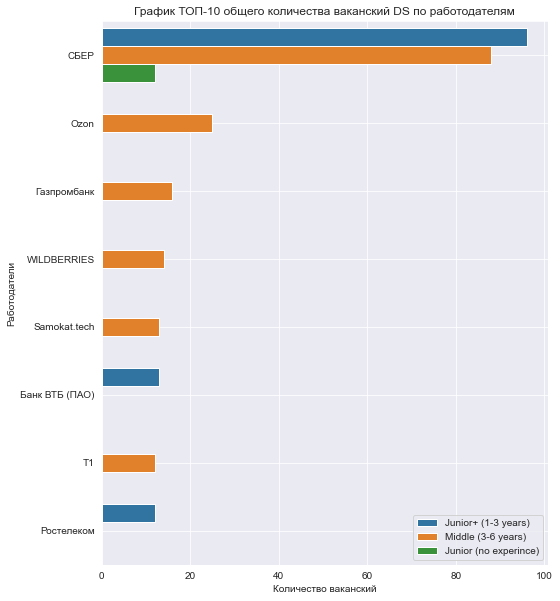

In [19]:
pl = df_t1.sort_values(by=['id'], ascending=False).head(10)
sns.set_style('dark')
plt.figure(figsize=(8, 10))
sns.barplot(x='id', y='employer', data=pl, hue='experience')
plt.title('График ТОП-10 общего количества ваканский DS по работодателям')
plt.xlabel('Количество ваканский')
plt.ylabel('Работодатели')
plt.legend(loc='lower right', fontsize=10)
plt.grid()
plt.show()

- В общем больше всего вакансий предлагает СБЕР для Junior+ и Middle специалистов DS.

In [20]:
da_j = da[da['experience'] == 'Junior (no experince)']
da_jp = da[da['experience'] == 'Junior+ (1-3 years)']
da_m = da[da['experience'] == 'Middle (3-6 years)']
da_s = da[da['experience'] == 'Senior (6+ years)']

In [21]:
ds_j = ds[ds['experience'] == 'Junior (no experince)']
ds_jp = ds[ds['experience'] == 'Junior+ (1-3 years)']
ds_m = ds[ds['experience'] == 'Middle (3-6 years)']
ds_s = ds[ds['experience'] == 'Senior (6+ years)']

- Разделили датасеты по категориям, для дальнейшего анализа.

In [22]:
da_j.groupby(['employer', 'salary_bin', 'employment', \
             'schedule']).agg({'id': 'count'}).sort_values(by = 'id', ascending = False).head(10)

,,,,id
employer,salary_bin,employment,schedule,
СБЕР,ЗП не указана,Полная занятость,Полный день,10
"МАГНИТ, Розничная сеть",ЗП не указана,Полная занятость,Полный день,4
"Согласие, страховая компания",ЗП не указана,Полная занятость,Полный день,4
"МАГНИТ, Розничная сеть",Меньше 100 тысяч,Полная занятость,Полный день,3
DNS Технологии,ЗП не указана,Полная занятость,Полный день,3
Юникон АП,ЗП не указана,Стажировка,Полный день,2
НАО ИРМАСТ-ХОЛДИНГ,ЗП не указана,Полная занятость,Полный день,2
"РЕСО-Гарантия, САО",ЗП не указана,Полная занятость,Полный день,2
Правительство Москвы,ЗП не указана,Полная занятость,Полный день,2


- После группировки данных видно, что типичная вакансия для Junior Аналитиков у СБЕР, полная занятость, на полный день, при этом ЗП не указана.

In [23]:
da_jp.groupby(['employer', 'salary_bin', 'employment', \
             'schedule']).agg({'id': 'count'}).sort_values(by = 'id', ascending = False).head(10)

,,,,id
employer,salary_bin,employment,schedule,
СБЕР,ЗП не указана,Полная занятость,Полный день,152
Банк ВТБ (ПАО),ЗП не указана,Полная занятость,Полный день,24
МТС,ЗП не указана,Полная занятость,Полный день,15
Ozon,ЗП не указана,Полная занятость,Полный день,15
WILDBERRIES,ЗП не указана,Полная занятость,Полный день,13
Okko,ЗП не указана,Полная занятость,Полный день,12
"МАГНИТ, Розничная сеть",ЗП не указана,Полная занятость,Удаленная работа,12
Центральный банк Российской Федерации,ЗП не указана,Полная занятость,Полный день,12
Правительство Москвы,ЗП не указана,Полная занятость,Полный день,11


- После группировки данных видно, что типичная вакансия для Junior+ Аналитиков у СБЕР, полная занятость, на полный день, при этом ЗП не указана.

In [24]:
da_m.groupby(['employer', 'salary_bin', 'employment', \
             'schedule']).agg({'id': 'count'}).sort_values(by = 'id', ascending = False).head(10)

,,,,id
employer,salary_bin,employment,schedule,
СБЕР,ЗП не указана,Полная занятость,Полный день,71
Т1,ЗП не указана,Полная занятость,Полный день,18
WILDBERRIES,ЗП не указана,Полная занятость,Полный день,16
Яндекс,ЗП не указана,Полная занятость,Полный день,14
INGURU.RU,Больше 300 тысяч,Полная занятость,Удаленная работа,9
Ozon,ЗП не указана,Полная занятость,Полный день,8
WILDBERRIES,ЗП не указана,Полная занятость,Удаленная работа,8
Maxim technology,ЗП не указана,Полная занятость,Полный день,8
USETECH,ЗП не указана,Полная занятость,Полный день,8


- После группировки данных видно, что типичная вакансия для Middle Аналитиков у СБЕР, полная занятость, на полный день, при этом ЗП не указана.

In [25]:
da_s.groupby(['employer', 'salary_bin', 'employment', \
             'schedule']).agg({'id': 'count'}).sort_values(by = 'id', ascending = False).head(10)

id
employer           salary_bin                employment       schedule            
Леруа Мерлен       ЗП не указана             Полная занятость Удаленная работа   3
Aramco Innovations ЗП не указана             Полная занятость Полный день        1
B2Broker           ЗП не указана             Полная занятость Полный день        1
CloudPayments      ЗП не указана             Полная занятость Полный день        1
PayMatrix          От 200 тысяч до 300 тысяч Полная занятость Удаленная работа   1
Reinvent Baltics   ЗП не указана             Полная занятость Полный день        1
                                                              Удаленная работа   1
Spice Agency       ЗП не указана             Полная занятость Полный день        1
Леруа Мерлен       ЗП не указана             Полная занятость Полный день        1
Мединвестгрупп     ЗП не указана             Полная занятость Полный день        1

- После группировки данных видно, что типичная вакансия для Senior Аналитиков это в основном полная занятость, но попадается и удалённая работа, на полный день, при этом ЗП не указана.

In [26]:
ds_j.groupby(['employer', 'salary_bin', 'employment', \
             'schedule']).agg({'id': 'count'}).sort_values(by = 'id', ascending = False).head(10)

,,,,id
employer,salary_bin,employment,schedule,
СБЕР,ЗП не указана,Стажировка,Полный день,7
Молвер,ЗП не указана,Полная занятость,Удаленная работа,5
СБЕР,ЗП не указана,Полная занятость,Полный день,4
Правительство Москвы,ЗП не указана,Полная занятость,Полный день,3
Lamoda Tech,ЗП не указана,Полная занятость,Гибкий график,2
Ozon,ЗП не указана,Стажировка,Полный день,2
BND LLC,Меньше 100 тысяч,Полная занятость,Полный день,1
МигКредит,ЗП не указана,Полная занятость,Полный день,1
Шлюмберже,ЗП не указана,Полная занятость,Полный день,1


- После группировки данных видно, что типичная вакансия для Junior DS у СБЕР, предлагают стажировку, на полный день, при этом ЗП не указана. Попадается удалённая работа и гибкий график.

In [27]:
ds_jp.groupby(['employer', 'salary_bin', 'employment', \
             'schedule']).agg({'id': 'count'}).sort_values(by = 'id', ascending = False).head(10)

,,,,id
employer,salary_bin,employment,schedule,
СБЕР,ЗП не указана,Полная занятость,Полный день,95
Банк ВТБ (ПАО),ЗП не указана,Полная занятость,Полный день,13
Сахалин - Остров Возможностей,Больше 300 тысяч,Полная занятость,Полный день,9
МегаФон,ЗП не указана,Полная занятость,Полный день,7
Ростелеком,ЗП не указана,Полная занятость,Удаленная работа,7
Т1,ЗП не указана,Полная занятость,Удаленная работа,6
Газпромбанк,ЗП не указана,Полная занятость,Полный день,6
Ozon,ЗП не указана,Полная занятость,Полный день,6
ПКБ,ЗП не указана,Полная занятость,Удаленная работа,6


- После группировки данных видно, что типичная вакансия для Junior+ DS у СБЕР, на полный день, при этом ЗП не указана. Попадается удалённая работа.

In [28]:
ds_m.groupby(['employer', 'salary_bin', 'employment', \
             'schedule']).agg({'id': 'count'}).sort_values(by = 'id', ascending = False).head(10)

id
employer      salary_bin    employment       schedule            
СБЕР          ЗП не указана Полная занятость Полный день       87
WILDBERRIES   ЗП не указана Полная занятость Полный день       14
Ozon          ЗП не указана Полная занятость Удаленная работа  13
                                             Полный день       12
Samokat.tech  ЗП не указана Полная занятость Удаленная работа  11
Т1            ЗП не указана Полная занятость Удаленная работа  10
Газпромбанк   ЗП не указана Полная занятость Полный день        9
Газпром нефть ЗП не указана Полная занятость Полный день        8
Газпромбанк   ЗП не указана Полная занятость Удаленная работа   7
Okko          ЗП не указана Полная занятость Полный день        6

- После группировки данных видно, что типичная вакансия для Middle DS у СБЕР, на полный день, при этом ЗП не указана. Попадается удалённая работа.

In [29]:
ds_s.groupby(['employer', 'salary_bin', 'employment', \
             'schedule']).agg({'id': 'count'}).sort_values(by = 'id', ascending = False).head(10)

id
employer                       salary_bin                employment       schedule            
Fundraise Up                   ЗП не указана             Полная занятость Удаленная работа   3
Aramco Innovations             ЗП не указана             Полная занятость Полный день        2
РУСАЛ, Центр подбора персонала ЗП не указана             Полная занятость Полный день        2
Sape                           ЗП не указана             Полная занятость Полный день        2
Гудфокаст                      ЗП не указана             Полная занятость Полный день        2
7RedLines                      От 100 тысяч до 200 тысяч Полная занятость Удаленная работа   1
ГПМ Партнер                    ЗП не указана             Полная занятость Полный день        1
СБЕР                           ЗП не указана             Полная занятость Сменный график     1
                                                                          Полный день        1
РСХБ-Интех                     ЗП не указана             Полная занятость Полный день        1

- После группировки данных видно, что типичная вакансия для Senior DS на полный день, при этом ЗП не указана. Попадается удалённая работа.

In [30]:
df_j = da_j.groupby('employer').agg({'id': 'count'}).sort_values(by = 'id', ascending = False).head(5)
df_j

,id
employer,
СБЕР,13
"МАГНИТ, Розничная сеть",7
DNS Технологии,4
"Согласие, страховая компания",4
ANCOR,3


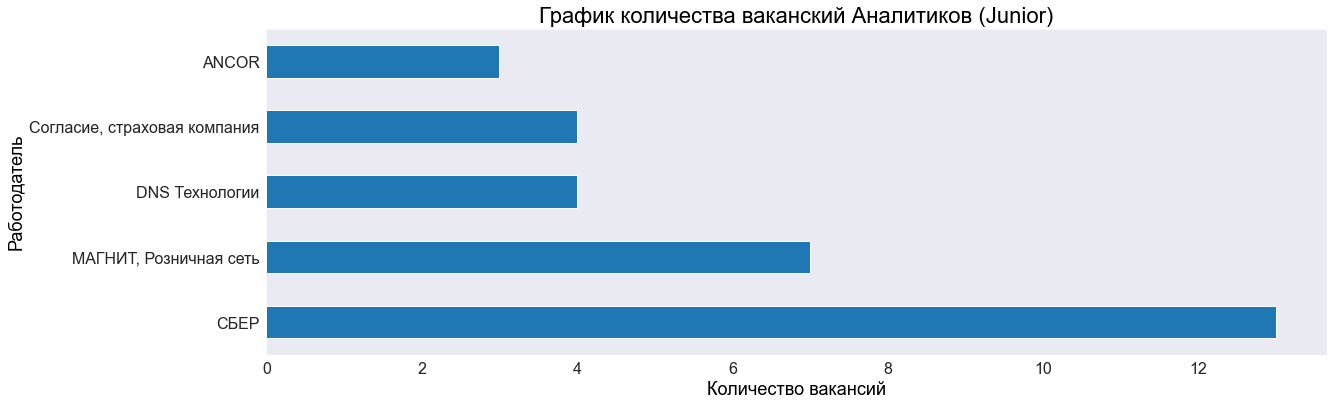

In [31]:
df_j.plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
plt.title('График количества ваканский Аналитиков (Junior)', 
          fontsize = 22, color = 'Black')
plt.xlabel('Количество вакансий', fontsize = 18, color = 'Black')
plt.ylabel('Работодатель', fontsize = 18, color = 'Black')
plt.show()

- Больше всего ваканский Junior DA у СБЕР

In [32]:
df_jp = da_jp.groupby('employer').agg({'id': 'count'}).sort_values(by = 'id', ascending = False).head(5)
df_jp

,id
employer,
СБЕР,159
Банк ВТБ (ПАО),24
Ozon,17
WILDBERRIES,16
"МАГНИТ, Розничная сеть",15


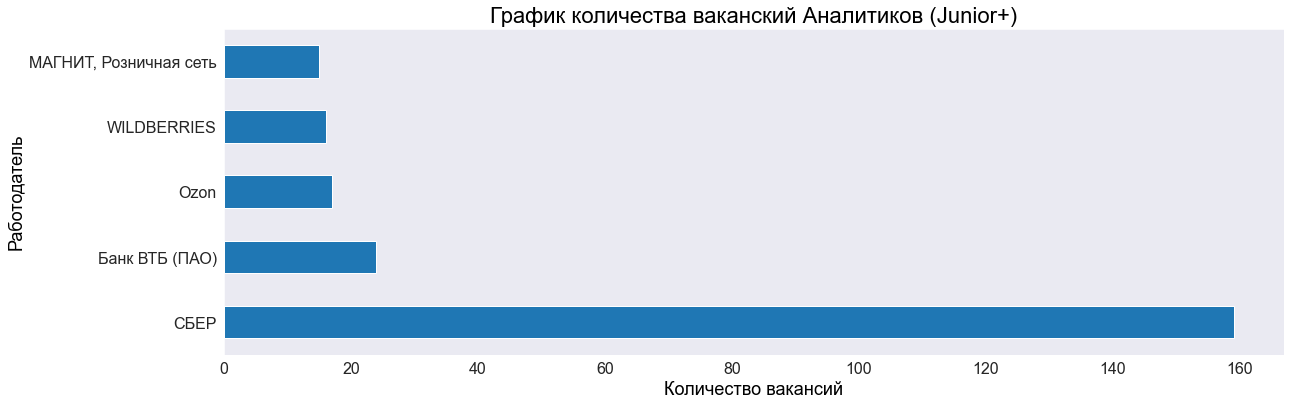

In [33]:
df_jp.plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
plt.title('График количества ваканский Аналитиков (Junior+)', 
          fontsize = 22, color = 'Black')
plt.xlabel('Количество вакансий', fontsize = 18, color = 'Black')
plt.ylabel('Работодатель', fontsize = 18, color = 'Black')
plt.show()

- Больше всего ваканский Junior+ DA у СБЕР

In [34]:
df_m = da_m.groupby('employer').agg({'id': 'count'}).sort_values(by = 'id', ascending = False).head(5)
df_m

,id
employer,
СБЕР,71
WILDBERRIES,26
Т1,21
Ozon,15
Яндекс,14


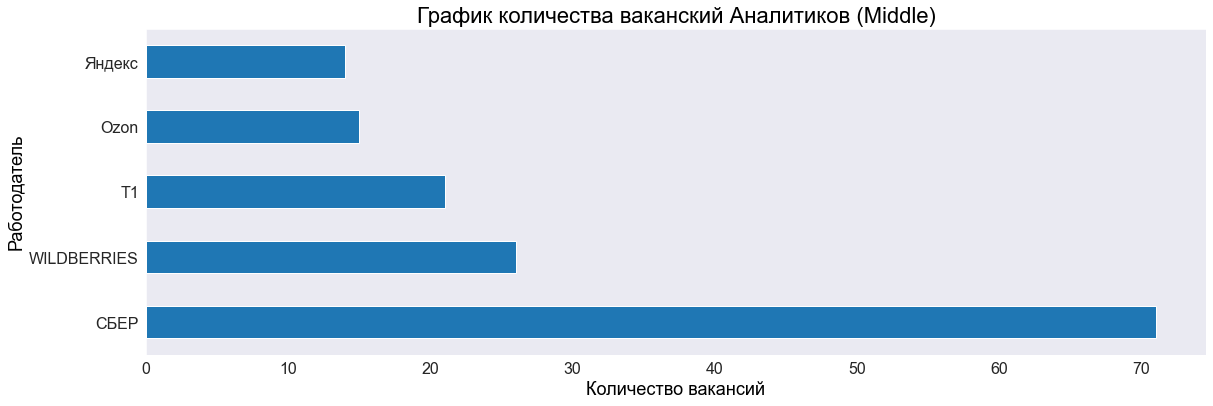

In [35]:
df_m.plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
plt.title('График количества ваканский Аналитиков (Middle)', 
          fontsize = 22, color = 'Black')
plt.xlabel('Количество вакансий', fontsize = 18, color = 'Black')
plt.ylabel('Работодатель', fontsize = 18, color = 'Black')
plt.show()

- Больше всего ваканский Middle DA у СБЕР

In [36]:
df_s = da_s.groupby('employer').agg({'id': 'count'}).sort_values(by = 'id', ascending = False).head(5)
df_s

,id
employer,
Леруа Мерлен,4
Reinvent Baltics,2
Aramco Innovations,1
B2Broker,1
CloudPayments,1


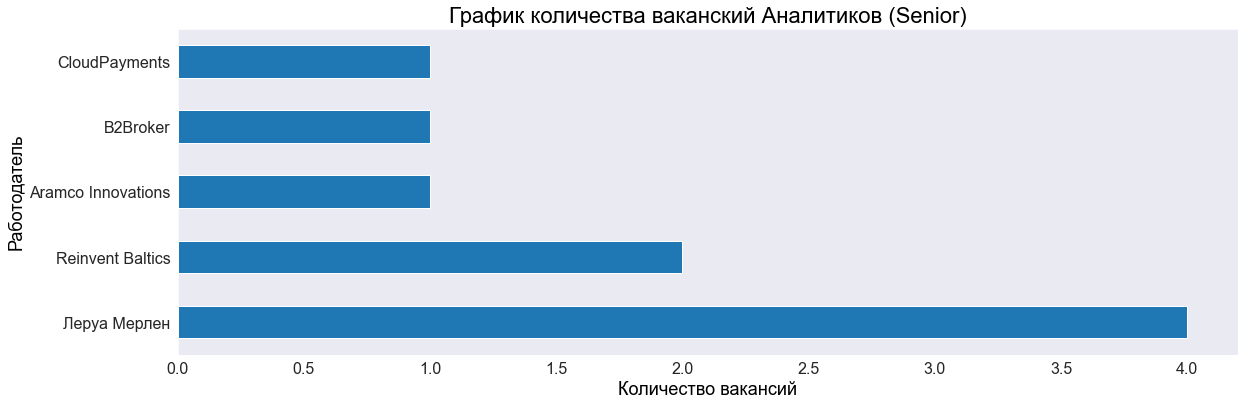

In [37]:
df_s.plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
plt.title('График количества ваканский Аналитиков (Senior)', 
          fontsize = 22, color = 'Black')
plt.xlabel('Количество вакансий', fontsize = 18, color = 'Black')
plt.ylabel('Работодатель', fontsize = 18, color = 'Black')
plt.show()

- Больше всего ваканский Senior DA у Леруа Мерлен

In [38]:
dfs_j = ds_j.groupby('employer').agg({'id': 'count'}).sort_values(by = 'id', ascending = False).head(5)
dfs_j

,id
employer,
СБЕР,12
Молвер,5
Ozon,4
Правительство Москвы,3
Lamoda Tech,2


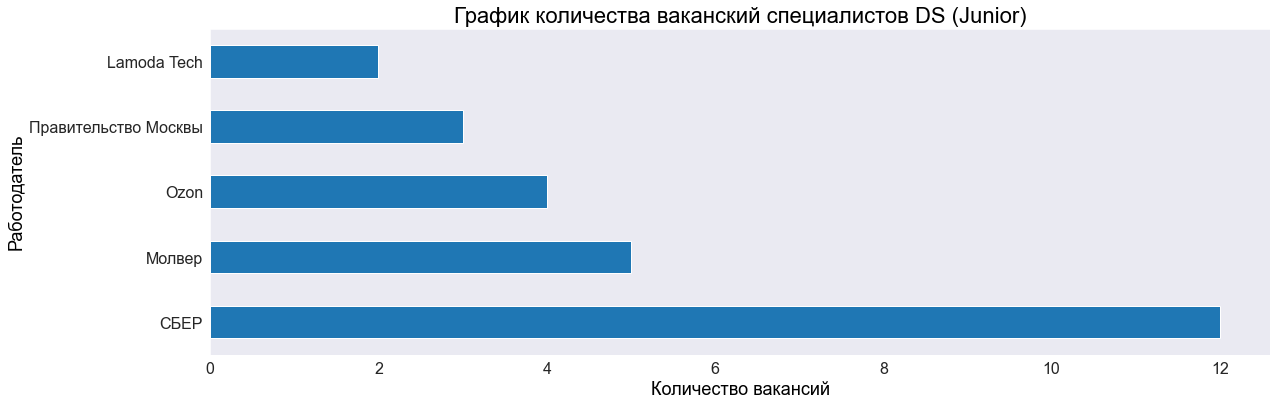

In [39]:
dfs_j.plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
plt.title('График количества ваканский специалистов DS (Junior)', 
          fontsize = 22, color = 'Black')
plt.xlabel('Количество вакансий', fontsize = 18, color = 'Black')
plt.ylabel('Работодатель', fontsize = 18, color = 'Black')
plt.show()

- Больше всего ваканский Junior DS у СБЕР

In [40]:
dfs_jp = ds_jp.groupby('employer').agg({'id': 'count'}).sort_values(by = 'id', ascending = False).head(5)
dfs_jp

,id
employer,
СБЕР,96
Банк ВТБ (ПАО),13
Ростелеком,12
Сахалин - Остров Возможностей,9
билайн,8


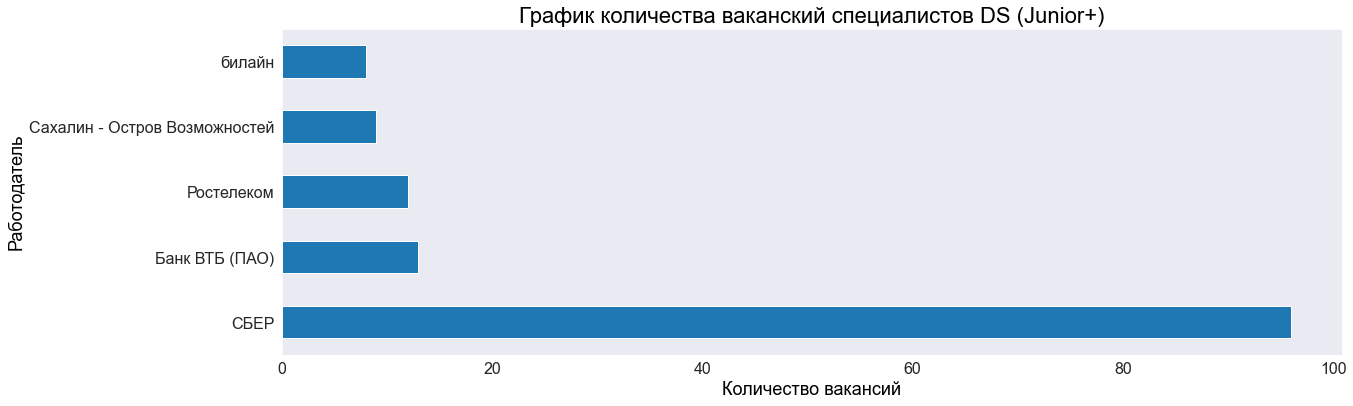

In [41]:
dfs_jp.plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
plt.title('График количества ваканский специалистов DS (Junior+)', 
          fontsize = 22, color = 'Black')
plt.xlabel('Количество вакансий', fontsize = 18, color = 'Black')
plt.ylabel('Работодатель', fontsize = 18, color = 'Black')
plt.show()

- Больше всего ваканский Junior+ DS у СБЕР

In [42]:
dfs_m = ds_m.groupby('employer').agg({'id': 'count'}).sort_values(by = 'id', ascending = False).head(5)
dfs_m

,id
employer,
СБЕР,88
Ozon,25
Газпромбанк,16
WILDBERRIES,14
Samokat.tech,13


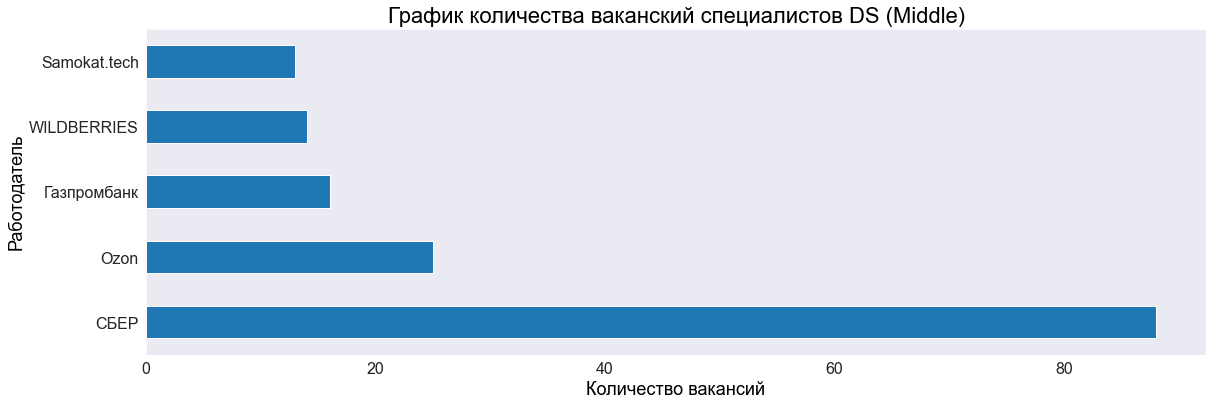

In [43]:
dfs_m.plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
plt.title('График количества ваканский специалистов DS (Middle)', 
          fontsize = 22, color = 'Black')
plt.xlabel('Количество вакансий', fontsize = 18, color = 'Black')
plt.ylabel('Работодатель', fontsize = 18, color = 'Black')
plt.show()

- Больше всего ваканский Middle DS у СБЕР

In [44]:
dfs_s = ds_s.groupby('employer').agg({'id': 'count'}).sort_values(by = 'id', ascending = False).head(5)
dfs_s

,id
employer,
Fundraise Up,3
СБЕР,2
Aramco Innovations,2
"РУСАЛ, Центр подбора персонала",2
Sape,2


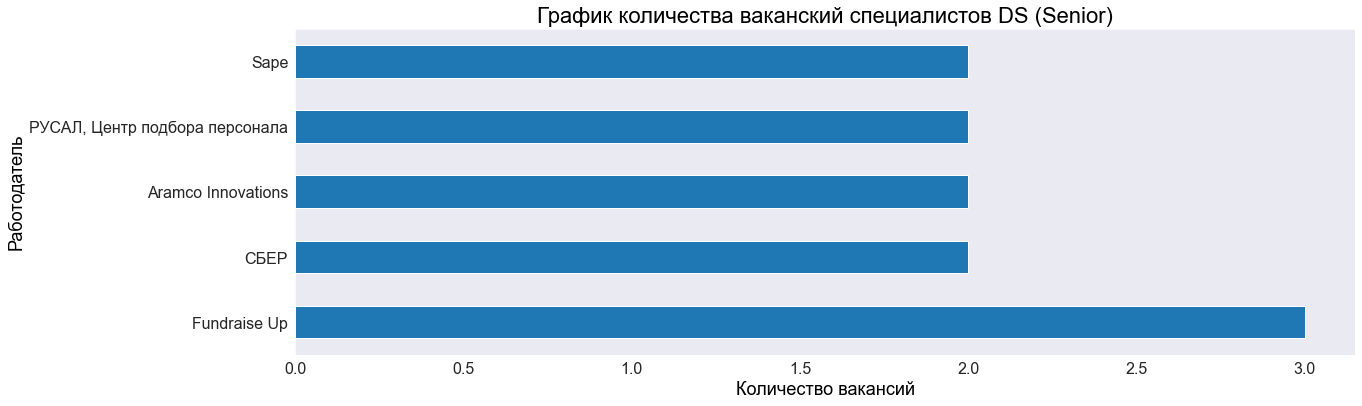

In [45]:
dfs_s.plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
plt.title('График количества ваканский специалистов DS (Senior)', 
          fontsize = 22, color = 'Black')
plt.xlabel('Количество вакансий', fontsize = 18, color = 'Black')
plt.ylabel('Работодатель', fontsize = 18, color = 'Black')
plt.show()

- Больше всего ваканский Senior DS у Fundraise Up

In [46]:
df_j2 = da_j.groupby('salary_bin').agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
df_j2

,id
salary_bin,
ЗП не указана,108
Меньше 100 тысяч,29
От 100 тысяч до 200 тысяч,5


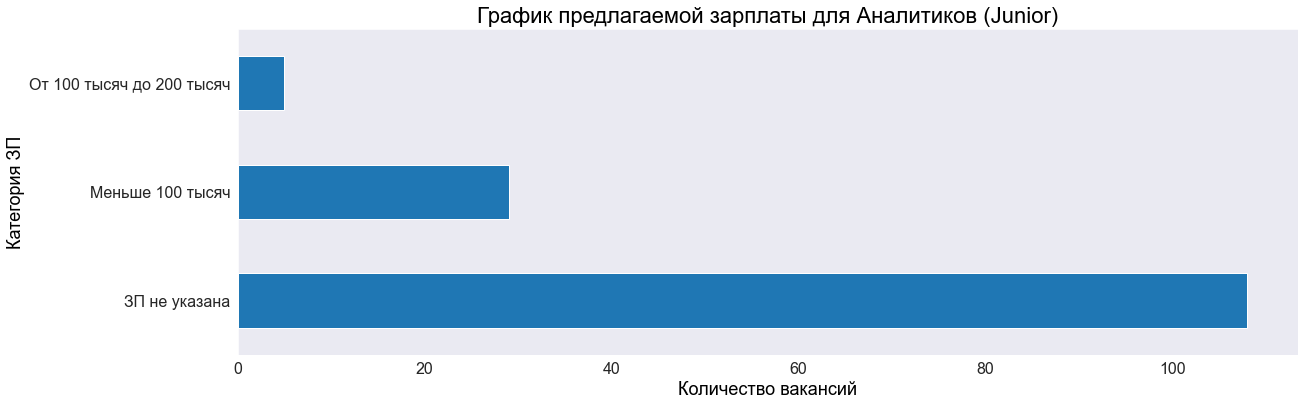

In [47]:
df_j2.plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
plt.title('График предлагаемой зарплаты для Аналитиков (Junior)', 
          fontsize = 22, color = 'Black')
plt.xlabel('Количество вакансий', fontsize = 18, color = 'Black')
plt.ylabel('Категория ЗП', fontsize = 18, color = 'Black')
plt.show()

- Если не учитывать неуказанную ЗП, то в основном предлагают в вакансиях для Junior DA менее 100 тысяч.

In [48]:
df_jp2 = da_jp.groupby('salary_bin').agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
df_jp2

,id
salary_bin,
ЗП не указана,960
От 100 тысяч до 200 тысяч,73
Меньше 100 тысяч,35
От 200 тысяч до 300 тысяч,21
Больше 300 тысяч,2


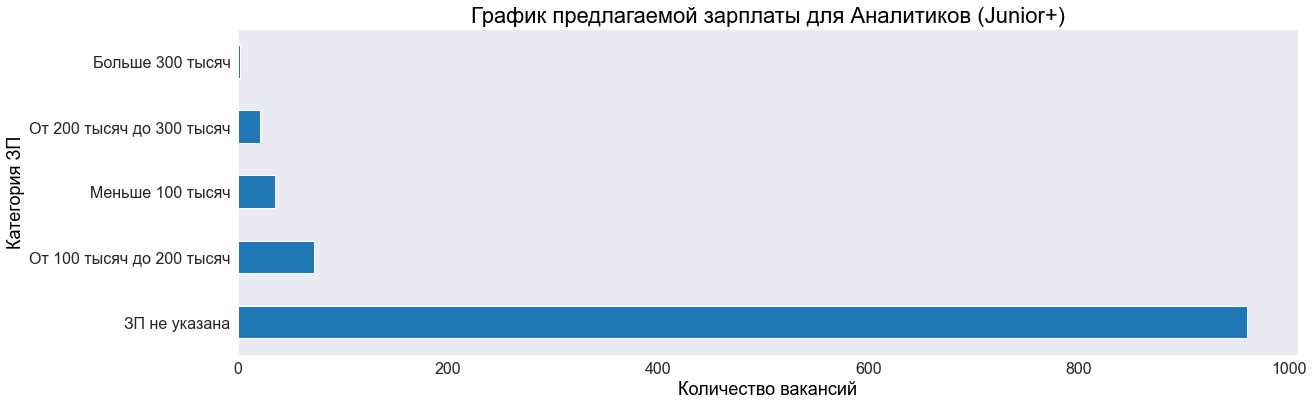

In [49]:
df_jp2.plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
plt.title('График предлагаемой зарплаты для Аналитиков (Junior+)', 
          fontsize = 22, color = 'Black')
plt.xlabel('Количество вакансий', fontsize = 18, color = 'Black')
plt.ylabel('Категория ЗП', fontsize = 18, color = 'Black')
plt.show()

- Если не учитывать неуказанную ЗП, то в основном предлагают в вакансиях для Junior+ DA 100-200 тысяч.

In [50]:
df_m2 = da_m.groupby('salary_bin').agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
df_m2

,id
salary_bin,
ЗП не указана,494
Больше 300 тысяч,26
От 100 тысяч до 200 тысяч,18
От 200 тысяч до 300 тысяч,13
Меньше 100 тысяч,4


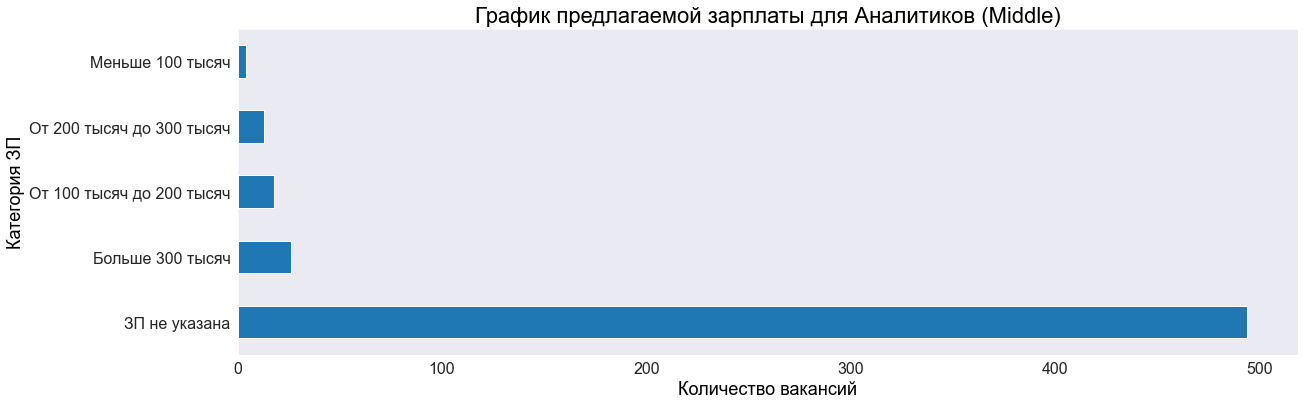

In [51]:
df_m2.plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
plt.title('График предлагаемой зарплаты для Аналитиков (Middle)', 
          fontsize = 22, color = 'Black')
plt.xlabel('Количество вакансий', fontsize = 18, color = 'Black')
plt.ylabel('Категория ЗП', fontsize = 18, color = 'Black')
plt.show()

- Если не учитывать неуказанную ЗП, то в основном предлагают в вакансиях для Middle DA более 300 тысяч.

In [52]:
df_s2 = da_s.groupby('salary_bin').agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
df_s2

,id
salary_bin,
ЗП не указана,11
От 200 тысяч до 300 тысяч,2


- Для Senior DA ЗП не указана, есть два предложения с ЗП 200-300 тысяч

In [53]:
dfs_j2 = ds_j.groupby('salary_bin').agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
dfs_j2

,id
salary_bin,
ЗП не указана,40
Меньше 100 тысяч,3
От 100 тысяч до 200 тысяч,1


- Для Junior DS ЗП не указана, 3 предложения с ЗП менее 100 тысяч и одно 100-200 тысяч

In [54]:
dfs_jp2 = ds_jp.groupby('salary_bin').agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
dfs_jp2

,id
salary_bin,
ЗП не указана,394
Больше 300 тысяч,17
От 200 тысяч до 300 тысяч,10
От 100 тысяч до 200 тысяч,7
Меньше 100 тысяч,5


- Для Junior+ DS ЗП не указана, 17 предложений с ЗП более 300 тысяч, 10 предложений 200-300 тысяч, 7 с ЗП 100-200 тысяч и 5 предложений менее 100 тысяч

In [55]:
dfs_m2 = ds_m.groupby('salary_bin').agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
dfs_m2

,id
salary_bin,
ЗП не указана,429
Больше 300 тысяч,22
От 200 тысяч до 300 тысяч,10
От 100 тысяч до 200 тысяч,4


- Для Middle DS ЗП не указана, 22 предложения с ЗП более 300 тысяч, 10 предложений 200-300 тысяч и 4 с ЗП 100-200 тысяч

In [56]:
dfs_s2 = ds_s.groupby('salary_bin').agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
dfs_s2

,id
salary_bin,
ЗП не указана,29
Больше 300 тысяч,2
От 100 тысяч до 200 тысяч,1


- Для Senior DS ЗП не указана, 2 предложения с ЗП более 300 тысяч и одно предложение 100-200 тысяч

In [57]:
df_j3 = da_j.groupby('employment').agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
df_j3

,id
employment,
Полная занятость,123
Стажировка,15
Частичная занятость,3
Проектная работа,1


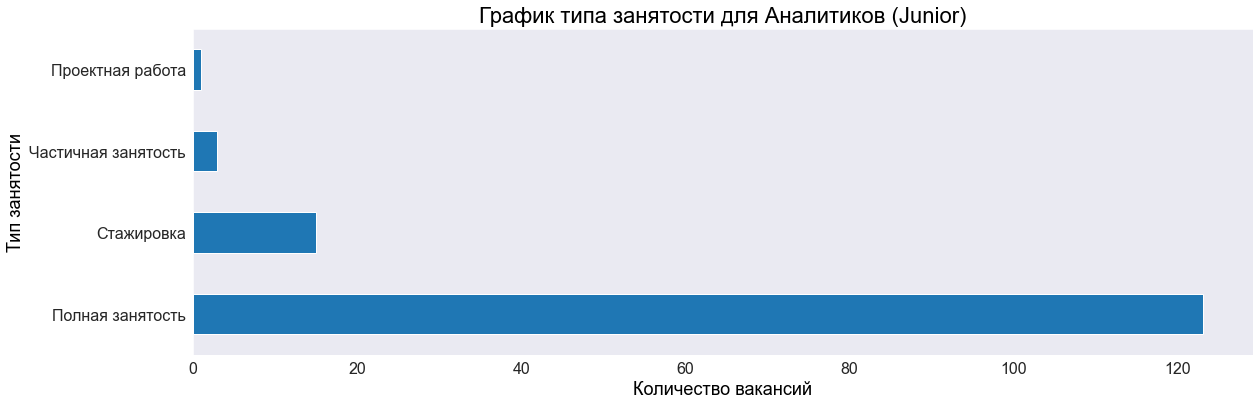

In [58]:
df_j3.plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
plt.title('График типа занятости для Аналитиков (Junior)', 
          fontsize = 22, color = 'Black')
plt.xlabel('Количество вакансий', fontsize = 18, color = 'Black')
plt.ylabel('Тип занятости', fontsize = 18, color = 'Black')
plt.show()

- В основном для Junior DA предлагают полную занятость

In [59]:
df_jp3 = da_jp.groupby('employment').agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
df_jp3

,id
employment,
Полная занятость,1079
Частичная занятость,8
Проектная работа,3
Стажировка,1


- В основном для Junior+ DA предлагают полную занятость

In [60]:
df_m3 = da_m.groupby('employment').agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
df_m3

,id
employment,
Полная занятость,549
Частичная занятость,5
Проектная работа,1


- В основном для Middle DA предлагают полную занятость

In [61]:
df_s3 = da_s.groupby('employment').agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
df_s3

,id
employment,
Полная занятость,13


- Для Senior DA предлагают только полную занятость

In [62]:
dfs_j3 = ds_j.groupby('employment').agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
dfs_j3

,id
employment,
Полная занятость,26
Стажировка,17
Проектная работа,1


- Для Junior DS в основном предлагают полную занятость, но также часто попадаются стажировки

In [63]:
dfs_jp3 = ds_jp.groupby('employment').agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
dfs_jp3

,id
employment,
Полная занятость,422
Частичная занятость,7
Проектная работа,2
Стажировка,2


- Для Junior+ DS в основном предлагают полную занятость

In [64]:
dfs_m3 = ds_m.groupby('employment').agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
dfs_m3

,id
employment,
Полная занятость,462
Проектная работа,2
Частичная занятость,1


- Для Middle DS в основном предлагают полную занятость

In [65]:
dfs_s3 = ds_s.groupby('employment').agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
dfs_s3

,id
employment,
Полная занятость,32


- Для Senior DS предлагают только полную занятость

In [66]:
df_j4 = da_j.groupby('schedule').agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
df_j4

,id
schedule,
Полный день,122
Удаленная работа,15
Гибкий график,3
Сменный график,2


- Для Junior DA в основном предлагают полный день

In [67]:
df_jp4 = da_jp.groupby('schedule').agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
df_jp4

,id
schedule,
Полный день,905
Удаленная работа,158
Гибкий график,21
Сменный график,7


- Для Junior+ DA в основном предлагают полный день, попадается и удалённая работа

In [68]:
df_m4 = da_m.groupby('schedule').agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
df_m4

,id
schedule,
Полный день,406
Удаленная работа,132
Гибкий график,17


- Для Middle DA в основном предлагают полный день, попадается и удалённая работа

In [69]:
df_s4 = da_s.groupby('schedule').agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
df_s4

,id
schedule,
Полный день,8
Удаленная работа,5


- Для Senior DA попадается как полный день, так и удалённая работа

In [70]:
dfs_j4 = ds_j.groupby('schedule').agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
dfs_j4

,id
schedule,
Полный день,28
Удаленная работа,9
Гибкий график,7


- Для Junior DS в основном предлагают полный день, иногда удалённую работу и гибкий график

In [71]:
dfs_jp4 = ds_jp.groupby('schedule').agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
dfs_jp4

,id
schedule,
Полный день,316
Удаленная работа,99
Гибкий график,15
Сменный график,3


- Для Junior+ DS в основном предлагают полный день, иногда удалённую работу

In [72]:
dfs_m4 = ds_m.groupby('schedule').agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
dfs_m4

,id
schedule,
Полный день,355
Удаленная работа,90
Гибкий график,19
Сменный график,1


- Для Middle DS в основном предлагают полный день, иногда удалённую работу

In [73]:
dfs_s4 = ds_s.groupby('schedule').agg({'id': 'count'}).sort_values(by = 'id', ascending = False)
dfs_s4

,id
schedule,
Полный день,24
Удаленная работа,5
Гибкий график,2
Сменный график,1


- Для Senior DS в основном предлагают полный день

#### Вывод по разделу:

Для типичной вакансии DA предлагают полный день и полную занятость, также как и для DS. На рынке больше всего требуются Аналитики уровня Junior+, в наименьшей степени Senior. Больше всего требуются специалисты по DS уровня Middle, в наименьшей степени Senior. Больше всего зарплата у для Middle DA более 300 тысяч, у специалистов DS, из имеющихся данных, больше всего ЗП у Middle и Junior+, также более 300 тысяч.

### Определение, какие навыки спрашивают чаще - твердые или мягкие. К какому грейду и к какой специальности требований больше.

In [74]:
da.sample(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
463,93131495,Аналитик данных по взысканию,2024-06-03 16:21:16,https://hh.ru/vacancy/93131495,Открытая,Ак Барс Банк,"Ак Барс Банк, Специалистам и руководителям",Казань,Junior+ (1-3 years),"['Анализ данных', 'Аналитическое мышление', 'S...",Полный день,Полная занятость,с 1993 года ак барс банк обеспечивает сотрудни...,1993 год ак барс банк обеспечивать сотрудник с...,75000.0,255000.0,От 200 тысяч до 300 тысяч,"SQL, Анализ данных, Работа с базами данных, Ан...",NaN,NaN
798,95464696,Главный эксперт (аналитик данных Excel),2024-03-25 17:13:05,https://hh.ru/vacancy/95464696,Открытая,Россельхозбанк,NaN,Москва,Junior+ (1-3 years),"['Развитые коммуникативные навыки', 'Аналитиче...",Полный день,Полная занятость,«ао россельхозбанк» - универсальный коммерческ...,ао россельхозбанк универсальный коммерческий б...,NaN,NaN,ЗП не указана,"Аналитический склад ума, Развитые коммуникатив...",NaN,NaN
935,96000802,Аналитик данных,2024-04-02 15:06:06,https://hh.ru/vacancy/96000802,Открытая,"Согласие, страховая компания",NaN,Москва,Junior+ (1-3 years),"['Работа с большим объемом информации', 'SQL',...",Полный день,Полная занятость,страховая компания «согласие» — один из лидеро...,страховой компания согласие лидер страховой ры...,NaN,NaN,ЗП не указана,"Аналитический склад ума, Работа с большим объе...",NaN,NaN
480,93285721,Data analyst/Аналитик данных,2024-03-16 13:48:01,https://hh.ru/vacancy/93285721,Открытая,Maxim technology,NaN,Тюмень,Middle (3-6 years),"['A/B тесты', 'Python', 'SQL', 'Pandas']",Полный день,Полная занятость,привет! мы - аккредитованная it компания maxim...,привет аккредитовать it компания maxim technol...,NaN,NaN,ЗП не указана,"SQL, Python, A/B тесты",Pandas,NaN
774,95379456,Аналитик данных (Проектный офис),2024-05-28 08:18:41,https://hh.ru/vacancy/95379456,Открытая,Центр финансовых технологий,NaN,Новосибирск,Junior+ (1-3 years),"['confluence', 'Проактивность', 'Pandas']",Полный день,Полная занятость,"обязанности: сбор цифровых данных, их анализ ...",обязанность сбор цифровой данные анализ тракто...,NaN,NaN,ЗП не указана,NaN,"Pandas, confluence",Проактивность


In [75]:
da.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1801 entries, 0 to 1800
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype         
---  ------                            --------------  -----         
 0   id                                1801 non-null   int64         
 1   name                              1801 non-null   object        
 2   published_at                      1801 non-null   datetime64[ns]
 3   alternate_url                     1801 non-null   object        
 4   type                              1801 non-null   object        
 5   employer                          1801 non-null   object        
 6   department                        521 non-null    object        
 7   area                              1801 non-null   object        
 8   experience                        1801 non-null   object        
 9   key_skills                        1801 non-null   object        
 10  schedule                          1801 non-null 

In [76]:
key_skills = da['key_skills']
key_skills

0                   ['Power BI', 'СУБД', 'Python', 'SQL']
1        ['MS SQL', 'Работа с базами данных', 'MS Excel']
2       ['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho...
3       ['Анализ данных', 'Коммуникация', 'SQL', 'MS O...
4                                        ['Документация']
                              ...                        
1796    ['Проактивность', 'Коммуникация', 'SQL', 'ad-h...
1797    ['Грамотная речь', 'Сводные таблицы', 'Сбор и ...
1798    ['Анализ данных', 'SQL', 'MS Power BI', 'Pytho...
1799    ['Анализ данных', 'SQL', 'MS Power BI', 'Pytho...
1800    ['Анализ данных', 'SQL', 'MS Power BI', 'Pytho...
Name: key_skills, Length: 1801, dtype: object

In [77]:
ks = pd.DataFrame(key_skills)
ks

,key_skills
0,"['Power BI', 'СУБД', 'Python', 'SQL']"
1,"['MS SQL', 'Работа с базами данных', 'MS Excel']"
2,"['SQL', 'Power BI', 'СУБД', 'Python', 'Clickho..."
3,"['Анализ данных', 'Коммуникация', 'SQL', 'MS O..."
4,['Документация']
...,...
1796,"['Проактивность', 'Коммуникация', 'SQL', 'ad-h..."
1797,"['Грамотная речь', 'Сводные таблицы', 'Сбор и ..."
1798,"['Анализ данных', 'SQL', 'MS Power BI', 'Pytho..."
1799,"['Анализ данных', 'SQL', 'MS Power BI', 'Pytho..."


In [78]:
# Преобразуем текстовые строки в реальные списки с помощью ast.literal_eval
ks['key_skills'] = ks['key_skills'].apply(ast.literal_eval)

# Теперь мы можем выполнить дальнейшую обработку, например, поиск уникальных значений
all_skills = ks['key_skills'].explode() # Преобразуем в длинный формат (один навык на строку)
unique_skills = all_skills.unique() # Находим уникальные навыки

# Выводим уникальные навыки
#unique_skills

In [79]:
all_skills.value_counts().head(60)

SQL                                    764
Python                                 579
Анализ данных                          408
Аналитическое мышление                 365
Pandas                                 304
Документация                           280
Power BI                               221
MS Excel                               207
Работа с базами данных                 185
Работа с большим объемом информации    183
Коммуникация                           181
Аналитика                              174
Data Analysis                          130
Базы данных                            128
MS SQL                                 124
confluence                             119
Математическая статистика              108
Аналитические исследования              99
Сбор и анализ информации                96
Tableau                                 91
PostgreSQL                              88
Статистический анализ                   72
MS PowerPoint                           62
Анализ бизн

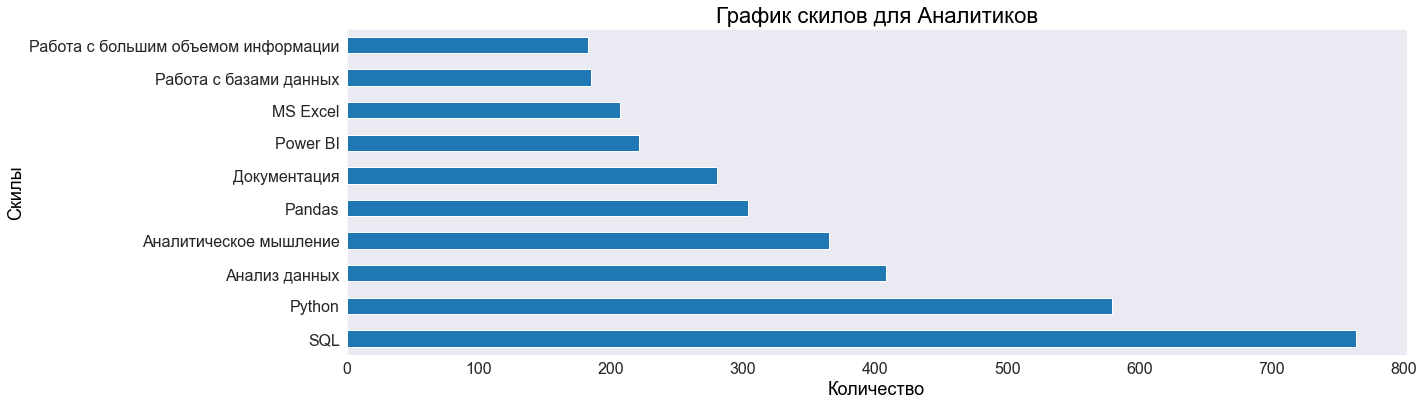

In [80]:
all_skills.value_counts().head(10).plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
plt.title('График скилов для Аналитиков', 
          fontsize = 22, color = 'Black')
plt.xlabel('Количество', fontsize = 18, color = 'Black')
plt.ylabel('Скилы', fontsize = 18, color = 'Black')
plt.show()

- Для Аналитиков ключевыми Hard навыками является SQL и Python, очень часто включают такой Soft скил, как Аналитическое мышление.

In [81]:
ds.sample(5)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,schedule,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description
552,95818485,"Data Scientist/Analyst ""Платформа эксперименто...",2024-05-23 12:48:56,https://hh.ru/vacancy/95818485,Открытая,Okko,NaN,Санкт-Петербург,Middle (3-6 years),"['A/B тесты', 'Python', 'confluence', 'SQL']",Полный день,Полная занятость,a/b эксперименты – ключевой инструмент для при...,a b эксперимент ключевой инструмент принятие р...,NaN,NaN,ЗП не указана,"Python, SQL, A/B тесты",confluence,NaN
456,95194883,ML-разработчик/Data Scientist,2024-03-21 13:37:45,https://hh.ru/vacancy/95194883,Открытая,Компания БКС,БКС IT & Digital,Москва,Middle (3-6 years),"['Python', 'Machine Learning', 'NLP', 'Pandas'...",Полный день,Полная занятость,"бкс финтех – ит-компания, входящая в бкс мир и...",бкс финтех ита компания входить бкс мир инвест...,NaN,NaN,ЗП не указана,"Python, AI/ML, NLP, Machine Learning",Pandas,NaN
507,95558385,Data scientist/ML engineer,2024-03-26 16:36:15,https://hh.ru/vacancy/95558385,Открытая,"Ренессанс cтрахование, Группа",NaN,Москва,Junior+ (1-3 years),"['Python', 'MLFlow', 'SQL', 'NLP', 'Pandas', '...",Полный день,Полная занятость,с 1997 года команда «ренессанс страхование» по...,1997 год команда ренессанс страхование помогат...,NaN,NaN,ЗП не указана,"DVC, MLFlow, SQL, Python, NLP, LLM",Pandas,NaN
541,95728796,Data Scientist в отдел разработки скоринговых ...,2024-03-28 18:15:23,https://hh.ru/vacancy/95728796,Открытая,Тинькофф,NaN,Москва,Middle (3-6 years),"['Python', 'Machine Learning', 'SQL', 'Pandas'...",Полный день,Полная занятость,принимаем решения на основе данных и тестов. и...,принимать решение основа данные тест искать ко...,NaN,NaN,ЗП не указана,"Python, ML, Machine Learning, SQL",Pandas,NaN
99,101362630,"Стажер Data Scientist, Логика ранжирования",2024-06-05 16:59:22,https://hh.ru/vacancy/101362630,Открытая,Ozon,Ozon Информационные технологии,Москва,Junior (no experince),"['Python', 'Разработка поисковых технологий', ...",Полный день,Стажировка,мы помогаем пользователю найти интересные ему ...,помогать пользователь находить интересный това...,NaN,NaN,ЗП не указана,"Python, IT, Разработка поисковых технологий, D...",NaN,NaN


In [82]:
key_skills_s = ds['key_skills']
key_skills_s

0                                                     []
1      ['Python', 'Hadoop', 'Machine Learning', 'Рабо...
2      ['Python', 'PyTorch', 'Machine Learning', 'Doc...
3                                                     []
4      ['DataLens', 'MS SQL', 'SQL', 'Spark', 'Аналит...
                             ...                        
969    ['Python', 'PyTorch', 'PySpark', 'CV', 'Kafka'...
970             ['Pandas', 'Документация', 'confluence']
971                                           ['Pandas']
972    ['Python', 'PyTorch', 'Keras', 'Решение нестан...
973    ['Pandas', 'Документация', 'Аналитическое мышл...
Name: key_skills, Length: 974, dtype: object

In [83]:
kss = pd.DataFrame(key_skills_s)
kss

,key_skills
0,[]
1,"['Python', 'Hadoop', 'Machine Learning', 'Рабо..."
2,"['Python', 'PyTorch', 'Machine Learning', 'Doc..."
3,[]
4,"['DataLens', 'MS SQL', 'SQL', 'Spark', 'Аналит..."
...,...
969,"['Python', 'PyTorch', 'PySpark', 'CV', 'Kafka'..."
970,"['Pandas', 'Документация', 'confluence']"
971,['Pandas']
972,"['Python', 'PyTorch', 'Keras', 'Решение нестан..."


In [84]:
# Преобразуем текстовые строки в реальные списки с помощью ast.literal_eval
kss['key_skills'] = kss['key_skills'].apply(ast.literal_eval)

# Теперь мы можем выполнить дальнейшую обработку, например, поиск уникальных значений
all_skills_s = kss['key_skills'].explode() # Преобразуем в длинный формат (один навык на строку)
unique_skills_s = all_skills_s.unique() # Находим уникальные навыки

# Выводим уникальные навыки
#unique_skills_s

In [85]:
all_skills_s.value_counts().head(60)

Python                             439
Pandas                             375
SQL                                260
Документация                       165
Machine Learning                   131
ML                                 112
Коммуникация                       111
Data Science                        81
Математическая статистика           81
confluence                          71
Юнит-экономика                      68
NLP                                 66
Big Data                            64
PyTorch                             64
Анализ данных                       62
Data Analysis                       53
Spark                               50
Машинное обучение                   49
Git                                 49
Аналитическое мышление              45
Математическое моделирование        44
Docker                              37
Hadoop                              37
Linux                               36
Статистический анализ               35
Numpy                    

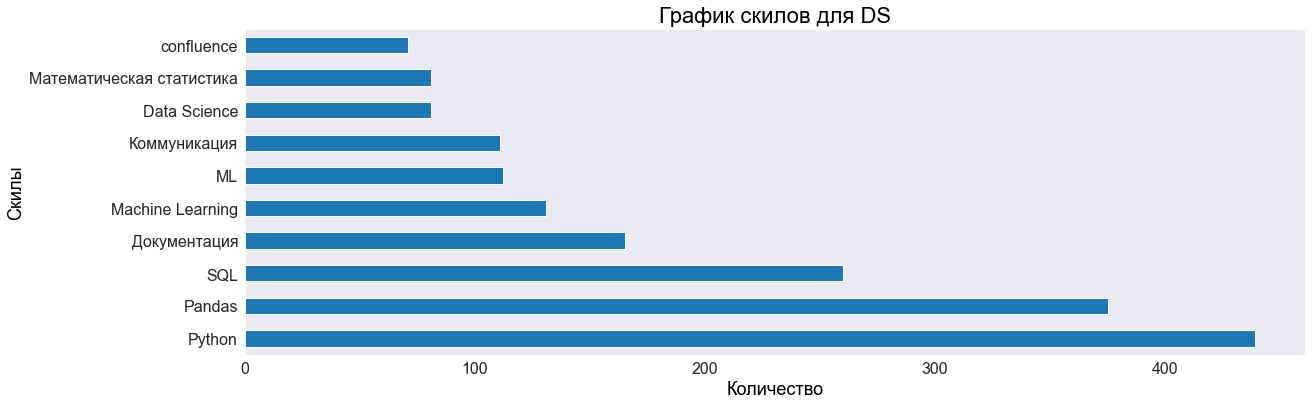

In [86]:
all_skills_s.value_counts().head(10).plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
plt.title('График скилов для DS', 
          fontsize = 22, color = 'Black')
plt.xlabel('Количество', fontsize = 18, color = 'Black')
plt.ylabel('Скилы', fontsize = 18, color = 'Black')
plt.show()

- Для DS ключевым Hard навыком является Python, из Soft скилов Коммуникация.

In [87]:
ks_j = pd.DataFrame(da_j['key_skills'])
ks_j['key_skills'] = ks_j['key_skills'].apply(ast.literal_eval)

all_skills_da_j = ks_j['key_skills'].explode()

all_skills_da_j.value_counts().head(10)

Аналитическое мышление                 40
SQL                                    37
Python                                 34
Анализ данных                          31
MS Excel                               28
Работа с большим объемом информации    19
Pandas                                 19
Коммуникация                           17
Документация                           17
Базы данных                            12
Name: key_skills, dtype: int64

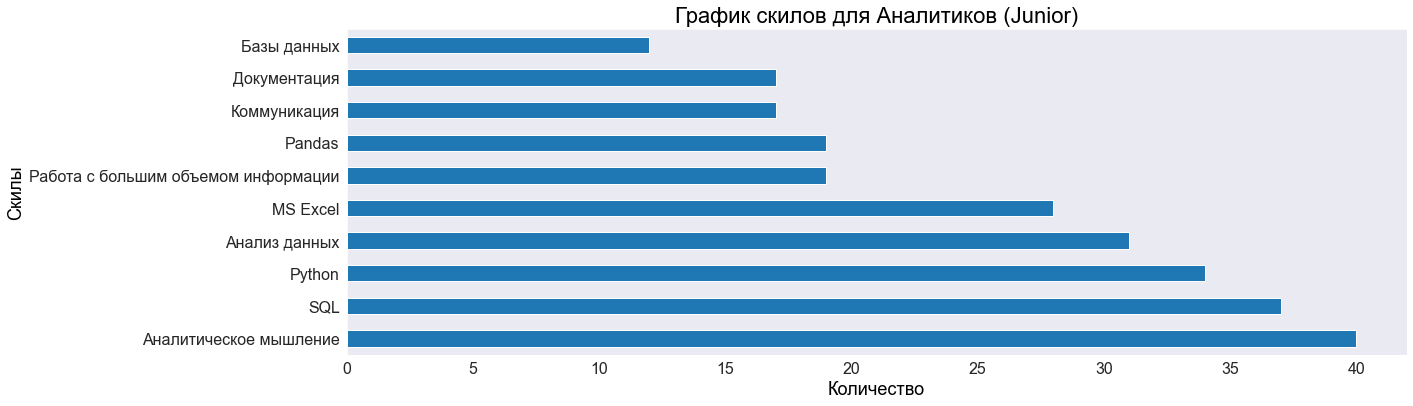

In [88]:
all_skills_da_j.value_counts().head(10).plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
plt.title('График скилов для Аналитиков (Junior)', 
          fontsize = 22, color = 'Black')
plt.xlabel('Количество', fontsize = 18, color = 'Black')
plt.ylabel('Скилы', fontsize = 18, color = 'Black')
plt.show()

- Для Junior DA чаще всего требуется Soft скилл Аналитическое мышление, после уже Hard SQL и Python, также требуется навыки в Exel

In [89]:
ks_jp = pd.DataFrame(da_jp['key_skills'])
ks_jp['key_skills'] = ks_jp['key_skills'].apply(ast.literal_eval)

all_skills_da_jp = ks_jp['key_skills'].explode()

all_skills_da_jp.value_counts().head(20)

SQL                                    469
Python                                 320
Анализ данных                          262
Аналитическое мышление                 241
Pandas                                 177
Документация                           150
MS Excel                               140
Power BI                               138
Работа с базами данных                 121
Работа с большим объемом информации    119
Аналитика                              114
Коммуникация                           105
MS SQL                                  75
Базы данных                             71
confluence                              68
Математическая статистика               66
Data Analysis                           64
Сбор и анализ информации                64
Аналитические исследования              57
Tableau                                 52
Name: key_skills, dtype: int64

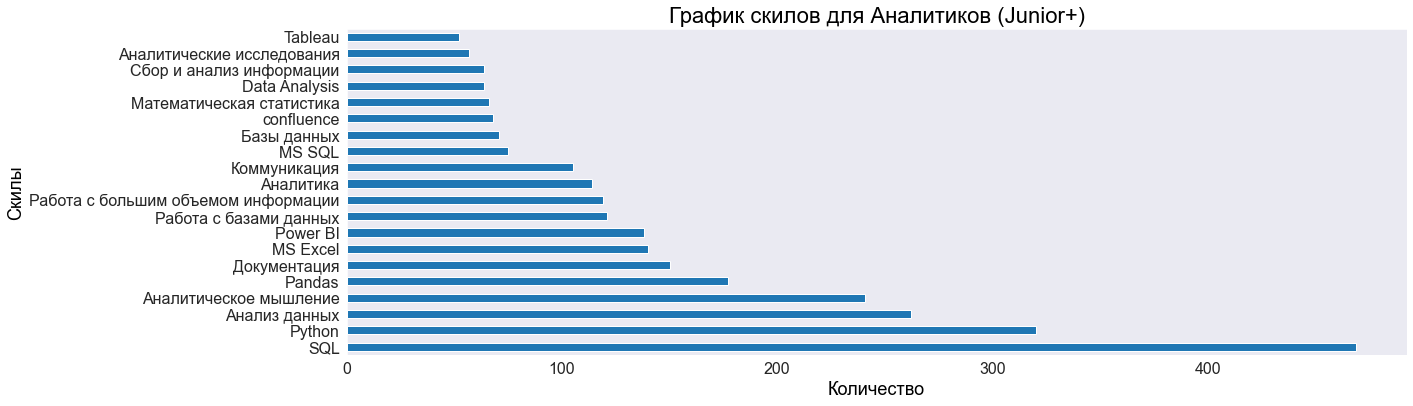

In [90]:
all_skills_da_jp.value_counts().head(20).plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
plt.title('График скилов для Аналитиков (Junior+)', 
          fontsize = 22, color = 'Black')
plt.xlabel('Количество', fontsize = 18, color = 'Black')
plt.ylabel('Скилы', fontsize = 18, color = 'Black')
plt.show()

- Для Junior+ DA уже чаще требуется Hard скилы SQL и Python, а уже после Soft скилл Аналитическое мышление

In [91]:
ks_m = pd.DataFrame(da_m['key_skills'])
ks_m['key_skills'] = ks_m['key_skills'].apply(ast.literal_eval)

all_skills_da_m = ks_m['key_skills'].explode()

all_skills_da_m.value_counts().head(20)

SQL                                    249
Python                                 216
Анализ данных                          114
Документация                           109
Pandas                                 104
Аналитическое мышление                  82
Power BI                                72
Data Analysis                           61
Коммуникация                            56
Работа с базами данных                  53
Аналитика                               49
Работа с большим объемом информации     45
MS SQL                                  45
Базы данных                             45
confluence                              44
MS Excel                                39
Математическая статистика               37
PostgreSQL                              36
Tableau                                 35
A/B тесты                               34
Name: key_skills, dtype: int64

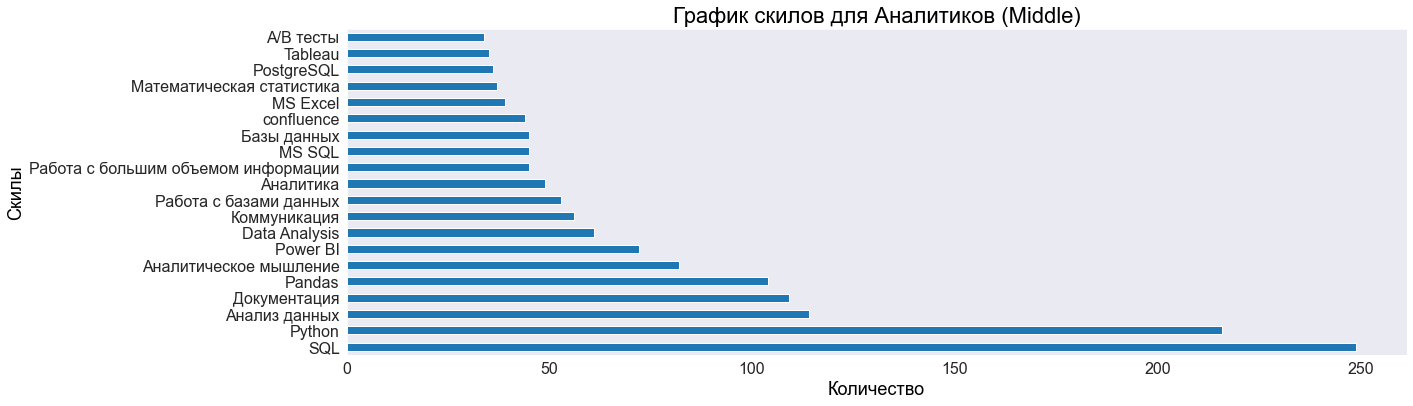

In [92]:
all_skills_da_m.value_counts().head(20).plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
plt.title('График скилов для Аналитиков (Middle)', 
          fontsize = 22, color = 'Black')
plt.xlabel('Количество', fontsize = 18, color = 'Black')
plt.ylabel('Скилы', fontsize = 18, color = 'Black')
plt.show()

- Для Middle DA чаще всего требуется Hard скилы SQL и Python, также Soft скилл Аналитическое мышление

In [93]:
ks_s = pd.DataFrame(da_s['key_skills'])
ks_s['key_skills'] = ks_s['key_skills'].apply(ast.literal_eval)

all_skills_da_s = ks_s['key_skills'].explode()

all_skills_da_s.value_counts().head(10)

Python            9
SQL               9
Документация      4
Power BI          4
confluence        4
Pandas            4
A/B тесты         3
Data Analysis     3
Юнит-экономика    3
Проактивность     3
Name: key_skills, dtype: int64

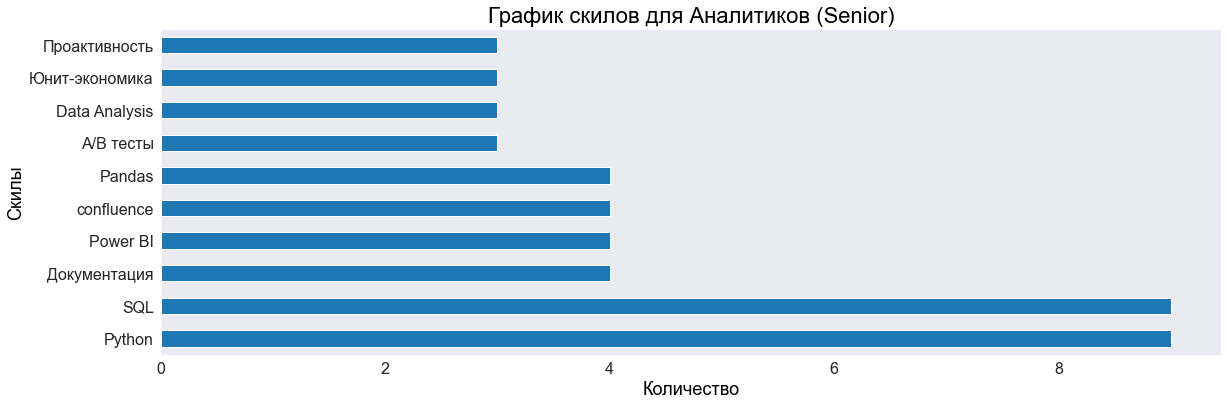

In [94]:
all_skills_da_s.value_counts().head(10).plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
plt.title('График скилов для Аналитиков (Senior)', 
          fontsize = 22, color = 'Black')
plt.xlabel('Количество', fontsize = 18, color = 'Black')
plt.ylabel('Скилы', fontsize = 18, color = 'Black')
plt.show()

- Для Senior DA чаще всего требуется Hard скилы SQL и Python, также Soft скилы не так часто спрашивают

In [95]:
kss_j = pd.DataFrame(ds_j['key_skills'])
kss_j['key_skills'] = kss_j['key_skills'].apply(ast.literal_eval)

all_skills_ds_j = kss_j['key_skills'].explode()

all_skills_ds_j.value_counts().head(10)

Python                       17
Математическая статистика     9
Pandas                        7
Data Mining                   7
Git                           6
Машинное обучение             5
Machine Learning              5
Документация                  4
ML                            4
SQL                           3
Name: key_skills, dtype: int64

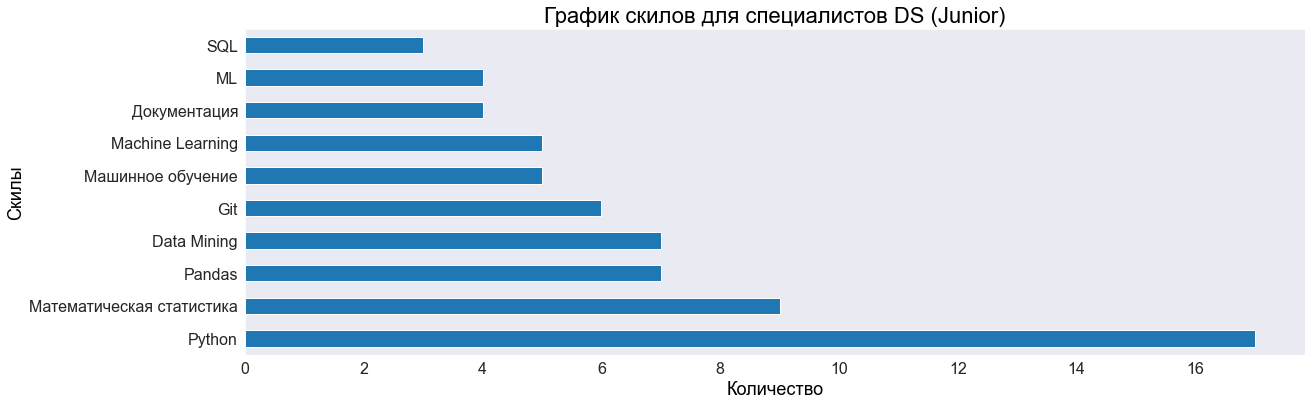

In [96]:
all_skills_ds_j.value_counts().head(10).plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
plt.title('График скилов для специалистов DS (Junior)', 
          fontsize = 22, color = 'Black')
plt.xlabel('Количество', fontsize = 18, color = 'Black')
plt.ylabel('Скилы', fontsize = 18, color = 'Black')
plt.show()

- Для Junior DS в основном требуются навыки Python, Soft не спрашивают

In [97]:
kss_jp = pd.DataFrame(ds_jp['key_skills'])
kss_jp['key_skills'] = kss_jp['key_skills'].apply(ast.literal_eval)

all_skills_ds_jp = kss_jp['key_skills'].explode()

all_skills_ds_jp.value_counts().head(20)

Python                          195
Pandas                          195
SQL                             138
Machine Learning                 67
Документация                     61
Коммуникация                     46
Математическая статистика        42
Big Data                         38
ML                               37
Data Science                     35
Математическое моделирование     32
confluence                       32
Юнит-экономика                   32
NLP                              31
Анализ данных                    31
Машинное обучение                27
Аналитическое мышление           25
PyTorch                          25
Статистический анализ            23
Data Analysis                    23
Name: key_skills, dtype: int64

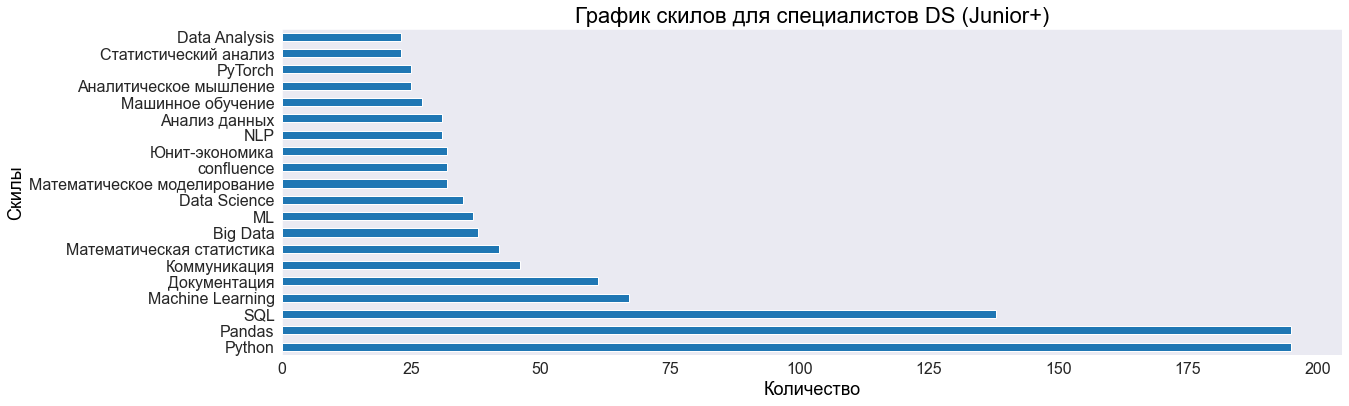

In [98]:
all_skills_ds_jp.value_counts().head(20).plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
plt.title('График скилов для специалистов DS (Junior+)', 
          fontsize = 22, color = 'Black')
plt.xlabel('Количество', fontsize = 18, color = 'Black')
plt.ylabel('Скилы', fontsize = 18, color = 'Black')
plt.show()

- Для Junior+ DS в основном требуются навыки Python, также часто спрашивают навыки SQL, Soft не спрашивают

In [99]:
kss_m = pd.DataFrame(ds_m['key_skills'])
kss_m['key_skills'] = kss_m['key_skills'].apply(ast.literal_eval)

all_skills_ds_m = kss_m['key_skills'].explode()

all_skills_ds_m.value_counts().head(20)

Python                       215
Pandas                       166
SQL                          113
Документация                  93
ML                            66
Коммуникация                  61
Machine Learning              55
Data Science                  40
confluence                    35
PyTorch                       35
NLP                           34
Юнит-экономика                32
Docker                        32
Spark                         31
Математическая статистика     30
Hadoop                        26
Data Analysis                 24
Git                           24
Big Data                      23
Анализ данных                 23
Name: key_skills, dtype: int64

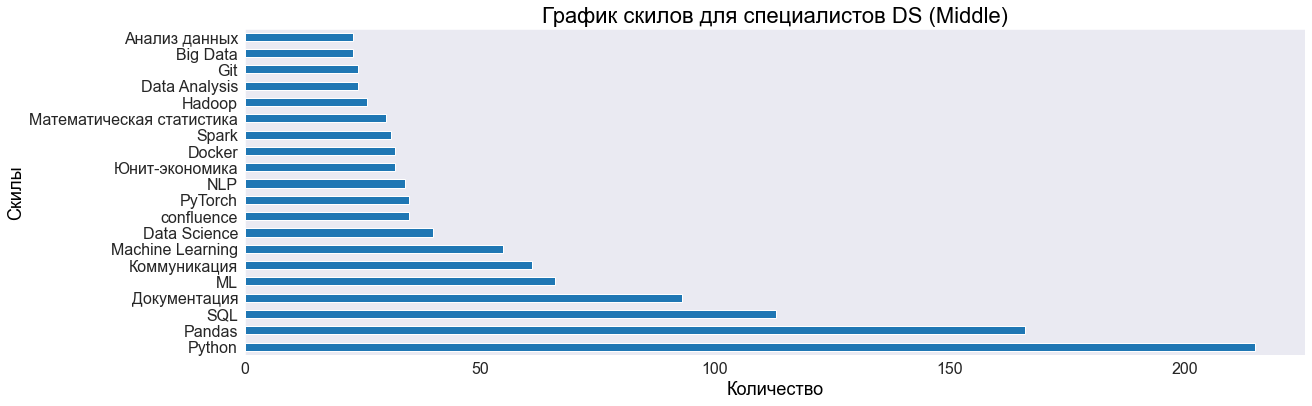

In [100]:
all_skills_ds_m.value_counts().head(20).plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
plt.title('График скилов для специалистов DS (Middle)', 
          fontsize = 22, color = 'Black')
plt.xlabel('Количество', fontsize = 18, color = 'Black')
plt.ylabel('Скилы', fontsize = 18, color = 'Black')
plt.show()

- Для Middle DS в основном требуются навыки Python, также часто спрашивают навыки SQL, Soft не спрашивают

In [101]:
kss_s = pd.DataFrame(ds_s['key_skills'])
kss_s['key_skills'] = kss_s['key_skills'].apply(ast.literal_eval)

all_skills_ds_s = kss_s['key_skills'].explode()

all_skills_ds_s.value_counts().head(10)

Python              12
Документация         7
Pandas               7
SQL                  6
Data Science         5
ML                   5
Анализ данных        5
PyTorch              4
Machine Learning     4
A/B тесты            3
Name: key_skills, dtype: int64

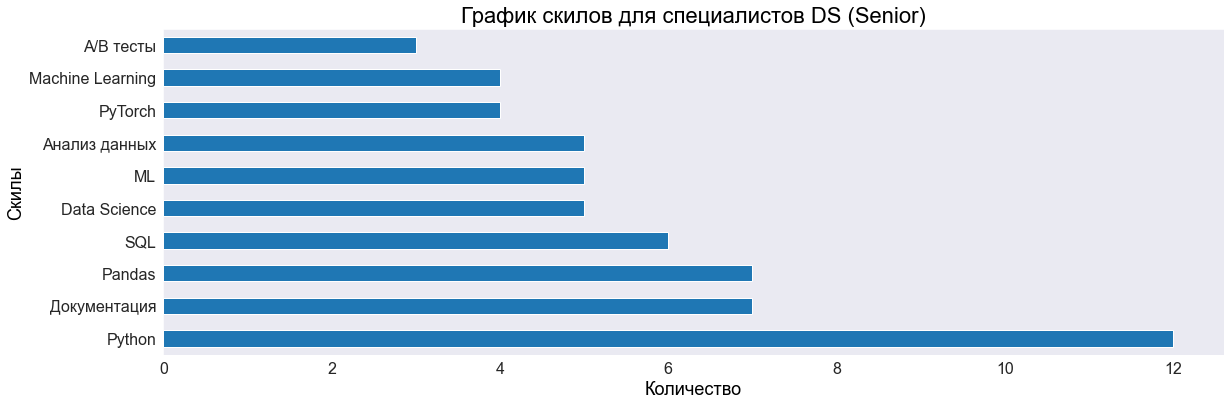

In [102]:
all_skills_ds_s.value_counts().head(10).plot(kind = 'barh', figsize = (19,6), legend = False, fontsize = 16)
plt.title('График скилов для специалистов DS (Senior)', 
          fontsize = 22, color = 'Black')
plt.xlabel('Количество', fontsize = 18, color = 'Black')
plt.ylabel('Скилы', fontsize = 18, color = 'Black')
plt.show()

- Для Senior DS в основном требуются навыки Python, также часто спрашивают навыки SQL, Soft не спрашивают

### Определение наиболее желаемых кандидатов на вакансии Аналитик данных и специалистов DS по следующим параметрам: самые важные hard-skils, самые важные soft-skils. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.

#### Исходя из предыдущего анализа сделаю общий вывод для двух разделов

Для Аналитиков ключевыми Hard навыками является SQL и Python, очень часто включают такой Soft скил, как Аналитическое мышление. Для DS ключевым Hard навыком является Python, из Soft скилов Коммуникация. Ключевым Hard навыком для всех грейдов DA является SQL, также очень часто требуются навыки Python, на начальных этапах спрашивают такой Soft скилл, как Аналитическое мышление, после уровня Middle Soft скилы не так часто спрашивают. Для всех уровней специалистов DS ключевым Hard навыком является Pethon, после Junior+ спрашивают ещё SQL, также требуется навыки Machine Learning, влючают такой навык, как Документация. Из Sofr скилов ключенвым навыком для большитсва DS будет Коммуникация.

### Расчет помесячной динамики количества вакансий для Аналитика данных и специалистов DS. Ответ отдельно дайте для грейдов Junior, Junior+, Middle, Senior.

In [103]:
da['month'] = da['published_at'].dt.month
da.sample(3)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,month
1678,99302539,Маркетолог-аналитик данных фармотрасли,2024-05-17 16:07:36,https://hh.ru/vacancy/99302539,Открытая,Уралбиофарм,NaN,Екатеринбург,Junior+ (1-3 years),[],...,Полная занятость,уралбиофарм - одно из крупнейших фармацевтичес...,уралбиофарм крупный фармацевтический предприят...,80000.0,NaN,ЗП не указана,NaN,NaN,NaN,5
1200,97237442,Аналитик данных (административно-хозяйственный...,2024-04-17 15:40:44,https://hh.ru/vacancy/97237442,Открытая,"МАГНИТ, Розничная сеть",NaN,Краснодар,Junior+ (1-3 years),"['Excel', 'SQL']",...,Полная занятость,чем предстоит заниматься: многосторонним и де...,предстоять заниматься многосторонний детальный...,NaN,NaN,ЗП не указана,"Excel, SQL",NaN,NaN,4
793,95452703,Ведущий аналитик данных,2024-03-25 15:17:05,https://hh.ru/vacancy/95452703,Открытая,СБЕР,Сбер для экспертов,Москва,Junior+ (1-3 years),[],...,Полная занятость,"мы – команда, которая разрабатывает сервис, ос...",команда разрабатывать сервис основывать систем...,NaN,NaN,ЗП не указана,NaN,NaN,NaN,3


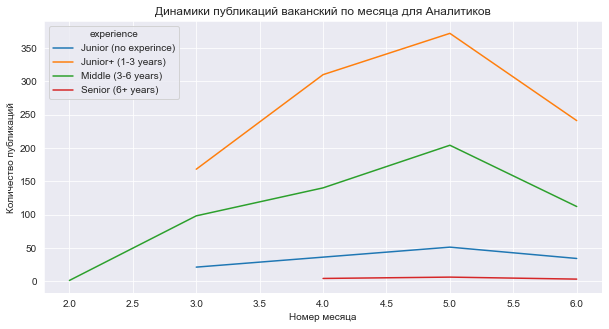

In [104]:
da.pivot_table(
    index='month', columns='experience', values='id', aggfunc='count'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('Количество публикаций')
plt.xlabel('Номер месяца')
plt.title('Динамики публикаций ваканский по месяца для Аналитиков')
plt.show()

- Исходя из имеющихся данных количество вакансий Аналитиков повышаются к Маю и на этот месяц приходится пик количества вакансий, далее постепенно идёт понижение.

In [105]:
ds['month'] = ds['published_at'].dt.month
ds.sample(3)

,id,name,published_at,alternate_url,type,employer,department,area,experience,key_skills,...,employment,description,description_lemmatized,salary_from,salary_to,salary_bin,key_skills_from_key_skills_field,hard_skills_from_description,soft_skills_from_description,month
164,87192229,Middle \ Senior Data scientist (команды CRM и ...,2024-06-04 13:56:37,https://hh.ru/vacancy/87192229,Открытая,Банк ВТБ (ПАО),"ПАО ВТБ, Технологический блок",Москва,Junior+ (1-3 years),"['Python', 'Hadoop', 'Креативность', 'confluen...",...,Полная занятость,"обязанности: работа с hadoop (impala, spark) ...",обязанность работа hadoop impala spark jupyter...,NaN,NaN,ЗП не указана,"Python, Hadoop, Spark, ML, DL",confluence,"Документация, Креативность",6
103,101405877,Data Scientist (Специалист по обработке и анал...,2024-06-06 10:55:21,https://hh.ru/vacancy/101405877,Открытая,Ventra IT Solutions,NaN,Москва,Junior+ (1-3 years),"['Python', 'PyTorch', 'data science', 'TensorF...",...,Полная занятость,ваши задачи: взаимодействие с заинтересованн...,ваш задача взаимодействие заинтересованный сто...,NaN,200000.0,От 200 тысяч до 300 тысяч,"Python, data science, Математическая статистик...",NaN,Документация,6
106,101417694,Data Scientist,2024-06-06 12:37:20,https://hh.ru/vacancy/101417694,Открытая,Ростелеком,NaN,Москва,Junior+ (1-3 years),"['Python', 'Machine Learning', 'SQL', 'Data Sc...",...,Полная занятость,"чем предстоит заниматься: анализ требований, ...",предстоять заниматься анализ требование дорабо...,NaN,NaN,ЗП не указана,"Python, Big Data, Machine Learning, NLP, Data ...",Pandas,NaN,6


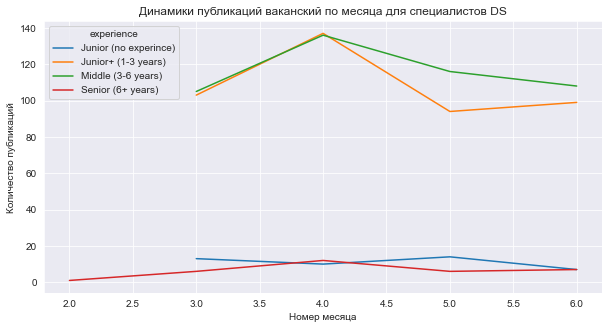

In [106]:
ds.pivot_table(
    index='month', columns='experience', values='id', aggfunc='count'
).plot(grid=True, figsize=(10, 5))
plt.ylabel('Количество публикаций')
plt.xlabel('Номер месяца')
plt.title('Динамики публикаций ваканский по месяца для специалистов DS')
plt.show()

- Исходя из имеющихся данных количество вакансий специалистов DS повышаются к Апрелю и на этот месяц приходится пик количества вакансий и больше всего у Junior+ и Middle, у Junior пик приходится на Май.

## Формулирование выводов и рекомендаций

Для тех, кто ищет работу, лучше всего это делать с апреля по май. Больше васего вакансий Анатиликов грейда Junior+, среди специалистов DS тоже достаточно много вакансий Junior+, но чаще всего встречаются Middle, так что, в таком случае, лучше достаточно большое количество времени уделить таким Hard навыкам, как SQL для Аналитиков, не забывая о Python. В случае для DS, в основном, прокачивать свои навыки в Python. Хорошими Soft скилами считаются Аналитическое мышление и Коммуникация, но их далеко не так часто спрашивают, как Hard скилы. 